# Análisis de industria de videojuegos

La tienda online "Ice" necesita identificar los patrones que determinan si un videojuego tiene éxito o no. Esto le permitirá a la tienda tener información de proyectos prometedores y así planificar campañas publicitarias para estos.

Poseemos datos correspondientes a videojuegos desde el año 1980 a 2016, lo que nos permitirá planificar los proyectos para 2017. 

Entre algunos de los datos que disponemos podemos mencionar: ventas para tres regiones distintas, calificaciones de crítica especializada y usuarios; plataformas y género al que pertenece cada videojuego; año de lanzamiento y rating de clasificación de contenido.

 - Analizaremos estos datos para determinar patrones de comportamiento de ventas.
 - Segmentarémos datos de forma apropiada para determinar características importantes para el éxito.
 - Estudiarémos el perfil de los tipos de usuario de acuerdo a las regiones.
 
 
Nuestro informe tendrá la siguiente estructura:

**Tabla de contenidos:**

 **2. Inicialización:**
 
    - Carga de datos
    - Exploración inicial
    - Conclusiones preliminares
    
    
 **3. Preprocesamiento de datos:**
 
    - Valores ausentes
    - Cambios de tipos de datos
    - Correcciones varias
    - Conclusiones al fin del preprocesamiento
 
 
 **4. Análisis de datos:**
 
    - Historial de lanzamientos de videojuegos
    - Variación de ventas por plataforma
    - Plataformas populares del pasado
    - Ciclo de vida de las plataformas
    - Segmentación de datos
    - Plataformas líderes en ventas
    - Ventas globales
    - Influencia de la opinión de usuarios y expertos
    - Influencia del género en las ventas
    - Análisis por regiones
    
    
 **5. Pruebas de hipótesis:**
 
    - Pruebas de Levene
    - Pruebas T
    - Resultados finales
    
    
 **6. Conclusiones**

## Inicialización

Carga de librerías necesarias para el análisis de datos:

In [1]:
# Cargamos las librerías
import pandas as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

Abrimos el archivo de datos y lo asignamos al dataframe "games".

In [2]:
# Creamos un dataframe para los datos
games = pd.read_csv('/datasets/games.csv')

### Exploramos los datos iniciales

In [3]:
# Vemos la información general
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Comprobamos la cantidad de datos ausentes en cada columna:

In [4]:
# Comprobación de datos ausentes
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
# Vemos los primeros valores de nuestro dataset
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Descripción de los datos:**

Nuestro dataframe contiene un total de 16715 registros, ordenados a través de 11 columnas.

Las columnas y sus características de datos son las siguientes:

**1. Name** *(nombre del videojuego)*
   - Dos valores ausentes.
   - Tipo object.
   
   
**2. Platform** *(plataforma)*
   - No existen valores ausentes.
   - Tipo object.
   
   
**3. Year of Release** *(año de lanzamiento)*
   - 269 valores ausentes.
   - Tipo float.
   
   
**4. Genre** *(género)*
   - Dos valores ausentes.
   - Tipo float.
   
   
**5. NA_sales** *(ventas en Norteamérica en millónes de dólares estadounidenses)*
   - No existen valores ausentes.
   - Tipo float.
   
   
**6. EU_sales** *(ventas en Europa en millónes de dólares estadounidenses)*
   - No existen valores ausentes.
   - Tipo float.
   
   
**7. JP_sales** *(ventas en Japón en millónes de dólares estadounidenses)*
   - No existen valores ausentes.
   - Tipo float.
   
   
**8. Other_sales** *(ventas en otros países en millónes de dólares estadounidenses)*
   - No existen valores ausentes.
   - Tipo float.
   
   
**9. Critic_Score** *(puntuación con un máximo de 100)*
   - 8578 valores ausentes.
   - Tipo float.
   
   
**10. User_Score** *(puntuación con un máximo de 10)*
   - 6701 valores ausentes.
   - Tipo object
   
   
**11. Rating** *(ESRB - The Entertainment Software Rating Board)*
   - 6766 valores ausentes.
   - Tipo Object.

De acuerdo a la descripción de las columnas, podemos considerar lo siguiente de acuerdo a la información de sus datos:

### Conclusiones preliminares de acuerdo a la información de los datos

Tenemos un dataset de 11 columnas y 16715 registros en las que existen valores ausentes y algunos datos que podríamos cambiar de tipo. Detallaremos en cada uno de ellos:

**Valores ausentes:**
- Existen valores ausentes en las columnas: Name(2), Year of Release(269), Genre(2), Critic_Score(8578), User_Score(6701) y Rating(6766).
- Existe la casualidad que se repiten solo dos valores ausentes para Name y Genre, por lo tanto, confirmaremos si se trata de los mismos registros o no.
- Para los valores ausentes en Year of Release (año de lanzamiento del videojuego); esta característica la podriamos obtener a partir del título (considerando que existen varios registros para un solo título y que varían de acuerdo a la plataforma en que fue lanzada. Aún así no podemos determinar que el año de una plataforma sea el mismo para otro, pero si podría ser cercano. Veremos a simple vista si existe más de un registro por título:

In [6]:
# Valores de la columna Genre
games['Name'].value_counts()

Need for Speed: Most Wanted             12
Madden NFL 07                            9
FIFA 14                                  9
LEGO Marvel Super Heroes                 9
Ratatouille                              9
                                        ..
Samurai Western                          1
Just Dance: Summer Party                 1
Burning Road                             1
007 Racing                               1
Bae Yong-joon to Manabu Kankokugo DS     1
Name: Name, Length: 11559, dtype: int64

In [7]:
len(games['Name']) - games['Name'].nunique()

5156

Efectivamente existen varios registros para un solo juego (5156 repetidos); por lo tanto, de existir un valor ausente en un juego con un registro repetido, se podría estimar el año aproximado de lanzamiento.

- Para los valores ausentes en Critic_Score, User_Score y Rating puede darse una situación similar a la anterior en la que el título del juego este repetido debido a plataformas distintas. En este caso, la calificación puede corresponder al título sin importar la plataforma; por lo tanto, podríamos considerar analizar si esto efectivamente se da así, para reemplazar los valores ausentes de acuerdo a los valores asignados a cada título de juego.

**Tipos de datos:**
- Year of Release es de tipo float. Cambiaremos esta columna a tipo entero ya que corresponde al año de lanzamiento.
- Genre es de tipo float, pero nos da una descripción del género del videojuego, no un valor numérico. Por lo tanto, lo transformaremos a tipo Object. 

A continuación mostramos los valores de la columna Genre:


In [8]:
# Valores de la columna Genre
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

- User_Score es de tipo Object pero tiene la calificación de los usuarios con un máximo de 10. Pasaremos sus datos a tipo float.

**Otros aspectos:**
- Los nombres de las columnas comienzan con mayúsculas, lo que puede provocar errores en la manipulación de los datos. Se reemplazaran sus nombres para dejarlos en minúsculas.
- Comprobaremos si las columnas con variables cuantitativas presentan rangos coherentes de acuerdo a su propia carácteristica. Para eso veremos máximos y mínimos.
- Comprobaremos duplicados implícitos para las columnas: Name, Platform, Genre y Rating.
- Finalmente, comprobaremos la presencia de registros duplicados y los eliminaremos de existir.

## Preprocesamiento de datos

### Correción nombre de columnas

Comenzamos por cambiar el nombre de las columnas aplicando snake_case.

In [9]:
# Vemos los nombres actuales de las columnas
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
# Cambiamos a minúsculas los nombres
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 
                 'other_sales', 'critic_score', 'user_score', 'rating']

### Valores ausentes en Name y Genre

In [11]:
# Filtramos los valores ausentes en Name
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Se confirma la sospecha de que los valores nulos en la columna Name son coincidentes con los de la columna Genre.

Estos dos registros solo nos van a aportar datos a las ventas por año y plataforma. Si bien, no podremos determinar factores claros para el éxito de un videojuego (no tenemos el género ni la puntuación), estos dos registros pueden sumar a la estadística global para analizar el nivel de ventas por año.

La posible razón de ausencia de datos en este par de registros, puede ser debido a la antiguedad del juego y la plataforma. No podemos apreciar otro factor relevante por el que se pudo haber omitido la información del título y puntuación. 

**Dejaremos estos valores ausentes tal cual en el dataset.**

### Valores ausentes en Year of Release

In [12]:
# Asignamos una variable a todos los videojuegos que se repiten
visited = set()
dup_names= [x for x in games['name'] if x in visited or (visited.add(x) or False)]
len(dup_names)

5155

Tenemos 5155 juegos que se repiten en los que solo debe cambiar el tipo de plataforma. Veremos a simple vista la información de estos mediante un filtro:

In [13]:
games.query('name in @dup_names')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Tenemos la lista con juegos que no son únicos, poseen más de un registro debido a las distintas plataformas.

Si bien podemos deducir el año del juego solo por su nombre (si tenemos más registros del mismo), el factor 'plataforma' puede ser relevante. **El año de lanzamiento puede variar de acuerdo a la plataforma.**

Para esto, primero vamos a analizar los rangos de años de lanzamiento de videojuegos según las plataformas:

In [14]:
# Creamos una tabla dinámica
games_year_by_platform = games.pivot_table(index='platform', values='year_of_release', aggfunc=['mean','count', 'min', 'max', 'median'])
# Cambiamos los nombres de las columnas
games_year_by_platform.columns =['mean', 'count', 'min', 'max', 'median']
# Mostramos nuestra tabla ordenada de más a menos cantidad de juegos.
games_year_by_platform.sort_values(by='count', ascending= False)

,mean,count,min,max,median
platform,,,,,
PS2,2004.583921,2127,2000.0,2011.0,2005.0
DS,2008.185290,2121,1985.0,2013.0,2008.0
PS3,2010.840735,1306,2006.0,2016.0,2011.0
Wii,2008.966563,1286,2006.0,2016.0,2009.0
X360,2009.880682,1232,2005.0,2016.0,2010.0
PSP,2008.731769,1193,2004.0,2015.0,2009.0
PS,1998.005882,1190,1994.0,2003.0,1998.0
PC,2008.914316,957,1985.0,2016.0,2010.0
GBA,2003.210851,811,2000.0,2007.0,2003.0


Por lo general podemos apreciar una tendencia de duración de 10 años aproximadamente para las plataformas con más títulos en nuestro dataset.

**A la hora de analizar los factores que hacen exitoso un videojuego,** el año de lanzamiento puede quizás no ser tan relevante como la plataforma en la que se lanza o el género de este. El año nos puede dar un parámetro de comparación respecto a otros juegos de un mismo año; como por ejemplo, el nivel de ventas por regiones para juegos de cierto año o de ciertos periodos.
Las preferencias de los jugadores primero pasa por la restricción de la plataforma que posean y finalmente por el tipo de videojuego (género).

**El año de lanzamiento en cuanto a las preferencias podría tener una implicación en el estilo de videojuego, pero no lo consideramos tan relevante como la plataforma o el género.**

Vamos a dar un vistazo a la lista de juegos con valores ausentes en Year_of_Release:

In [15]:
# Filtramos de acuerdo a los valores ausentes de año de lanzamiento y los asignamos a una nueva variable
nan_year_games = games.query('year_of_release.isnull()')
nan_year_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Tenemos 269 juegos y a simple vista podemos observar que hay varios títulos deportivos en los que en el propio nombre, marcan el año. Generalmente estos títulos son lanzados a fines del año previo del cual se indica en el título propiamente tal; por ejemplo, FIFA Soccer 2004 es lanzado en el año 2003.

Vamos a ver las plataformas que cuentan con más valores ausentes:

In [16]:
nan_year_games['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

La mayor cantidad de valores ausentes se concentran en las plataformas que han lanzado juegos en la última década.

Vamos a ver algunos ejemplos para determinar cómo podríamos completar los valores ausentes:

In [17]:
# Ejemplo 1, Space Invaders
games.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Este juego presenta 4 registros de diferentes consolas. Tres de ellas presentan el año de lanzamiento pero es diferente en cada uno (debido a la plataforma).

¿Qué ocurre si asignamos el año medio de lanzamiento de Space Invaders al valor ausente en la plataforma 2600? :

In [18]:
games.query('name == "Space Invaders"')['year_of_release'].median()

1999.0

El año medio tendría que ser 1999, pero aquí tenemos un problema. La plataforma Atari 2600 (de acuerdo a nuestra tabla de juegos de acuerdo a año de lanzamiento) presenta un año máximo de 1989; por lo tanto, no estaría entre los valores normales para esa consola. En tal caso sería mejor asumir un año medio para tal plataforma, es decir, asignar el valor de 1982. Esto sería mucho más cercano a la realidad.

**Veamos otro ojemplo:**

In [19]:
# Ejemplo 2, Freaky Flyers
games.query('name == "Freaky Flyers"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10551,Freaky Flyers,PS2,2003.0,Racing,0.05,0.04,0.0,0.01,66.0,tbd,T
14532,Freaky Flyers,XB,2003.0,Racing,0.02,0.01,0.0,0.00,64.0,tbd,T
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T


En este caso, tenemos que el valor ausente está para la plataforma GameCube. Los otros dos valores se repiten. Esto puede ser un patrón común que se da en las consolas de las últimas décadas, en que el año de lanzamiento es el mismo o muy cercano para distintas plataformas.

**Vemos otro ejemplo:**

In [20]:
# Ejemplo 3, FIFA Soccer 2004
games.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Este caso corresponde a un título deportivo. Tenemos que de 4 plataformas, solo en una (PS2) el año de lanzamiento se encuentra ausente; mientras que en las otras es el mismo año para todas. Las plataformas son de épocas similares, por ende, estimamos que para PS2 debería ser el mismo año de lanzamiento.

**Otro ejemplo:**

In [21]:
# Ejemplo 4, Virtua Quest
games.query('name == "Virtua Quest"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15754,Virtua Quest,PS2,NaN,Role-Playing,0.01,0.01,0.0,0.0,53.0,7.6,T
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.0,0.0,55.0,5.5,T


En este último caso tenemos un título que no tiene el año de lanzamiento en ninguna de las dos plataformas. En este caso, podríamos usar el año medio para cada plataforma.

**¿Cómo trataremos los valores ausentes del año de lanzamiento?**
 - Primero que nada, nuestra columna year_of_release es muy sensible para el proyecto, por lo que no podemos realizar ciertas imputaciones que consideramos en los ejemplos previamente.

- **Solo consideraremos imputar con la moda en el caso de que el videojuego presente un valor único para las distintas plataformas.**


- No consideraremos calcular un valor medio de acuerdo al año de actividad de la plataforma, si hacemos esto estaríamos creando un dato que puede afectar drásticamente nuestras observaciones.

#### Reemplazo de valores ausentes en Year_of_Release

Para poder reemplazar los valores de acuerdo a los criterios que determinamos, veremos los valores únicos del año de lanzamiento para un juego seleccionado. 

- Deberíamos tener dos valores únicos en caso de ser posible el reemplazo: nan y el año único año que se repite. 


- En el caso de haber más años diferentes, el valor sería mayor a dos.


- En el caso de tener solo valores ausentes, el valor sería 1.


Veamos con el siguiente ejemplo:

In [22]:
len(games.query('name == "FIFA Soccer 2004"')['year_of_release'].unique())

2

El videojuego visto anteriormente, presentaba 4 registros, de cual en tres se repetía el mismo año. Tenemos que sus valores únicos son "nan" y el año que se repite.

In [23]:
len(games.query('name == "Space Invaders"')['year_of_release'].unique())

4

En este caso, todos los años son distintos, por lo que no se consideraría reemplazar su valor ausente.


**Usaremos un ciclo for para reemplazar los valores ausentes bajo esta condición.**

In [24]:
# Ciclo for para rellenar valores ausentes en year_of_release

for i in nan_year_games.index:
    name = nan_year_games.loc[i, 'name']  
    name_match = games.query('name == @name')
    
    if len(name_match['year_of_release'].unique()) == 2:
        games.loc[i, 'year_of_release'] = name_match['year_of_release'].mean()
        

In [25]:
# Vemos a cuánto disminuímos nuestros valores ausentes
games['year_of_release'].isnull().sum()

158

- Los valores ausentes para el año de lanzamiento disminuyeron de 269 a 158, es decir, logramos reemplazar exitosamente 111 valores ausentes en los que se presentaba solo un año de media para un mismo videojuego.


- No podemos realizar más imputaciones para no alterar una columna que es sensible para nuestro análisis.


- Conservamos los registros con valores nulos que nos quedan ya que nos pueden prestar otra información útil para el análisis.

### Valores ausentes en puntuaciones

In [26]:
# Vemos los valores ausentes de las columnas pendientes
games.isnull().sum()

name                  2
platform              0
year_of_release     158
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Nos queda pendiente los valores ausentes para las distintas puntuaciones: Critic_Score(8578), User_Score(6701) y Rating(6766).

La puntuación de la crítica, de usuarios y la calificación (ESRB); son factores que pueden estar directamente relacionados al éxito de un videojuego, en especial las dos primeras.

**La crítica de expertos (en escala de 1 a 100) puede influir directamente en la decisión de compra de un usuario, así mismo, la experiencia de otros usuarios (en escala de 1 a 10) puede afectar directamente a atraer nuevos consumidores a cierto videojuego.**

De otra manera, el rating ESRB, puede actuar como un filtro en la elección de compra, ya que muestra de forma clara el tipo de contenido que puede presentar un título.

Teniendo en cuenta la relevancia de estos factores, asumímos que forman parte de nuestras variables principales para comprender el éxito de los videojuegos; por lo tanto, no podemos rellenar sus valores ausentes.

**Lo que sí podemos verificar,** es que la crítica o rating ausente pueda estar presente en el mismo título pero en otra plataforma. El juego prácticamente debería tener la misma clasificación y crítica independiente de la plataforma.

De todas formas **no reemplazaremos las calificaciones ya que no dependen solo del juego sino que de sus características asociadas y perfil de quien lleva a cabo la calificación. No existe la información suficiente para hacer una imputación apropiada.** 


La observación de los valores ausentes a continuación, solo quedará a modo de profundizar el comportamiento que presentan:

#### Valores ausentes en Critic Score

In [27]:
# Creamos una variable para los valores ausentes de la puntuación de la crítica
nan_critic_score = games.query('critic_score.isnull()')
nan_critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Vamos a chequear si de la lista de nombres con valores ausentes en  Critic_Score, se presenta algún título que tenga la puntuación en el dataset completo.

In [28]:
# Función para comprobar ausencia de crítica

def critic_finder(row):
    name = row['name']
    
    name_match = games.query('name == @name')   
    
    for i in name_match.index:
        
        if pd.isna(name_match.loc[i, 'critic_score']) == False:
                   
                   return i

In [29]:
# Creamos una lista para aplicar la función que creamos
critic_list =[]
critic_list = nan_critic_score.apply(critic_finder, axis=1)

In [30]:
critic_list = critic_list.dropna()
critic_list

71         836.0
119        669.0
225        149.0
232        553.0
255         92.0
          ...   
16636     1050.0
16638    14162.0
16643    13729.0
16645     2055.0
16706     4000.0
Length: 961, dtype: float64

Esta serie nos muestra una relación de índices. A la izquierda, todos los índices de valores ausentes en Critic_Score que presentan el mismo videojuego en el dataset completo pero con un valor presente de Critic_Score. Este valor presente se encuentra en la columna derecha. 

Tomemos el siguiente ejemplo:

In [31]:
# Critic_Score para todos los juegos con el título: The Last of Us
games.query('name == "The Last of Us"')['critic_score']

149    95.0
225     NaN
Name: critic_score, dtype: float64

Los índices 149 y 225 pertenecen al juego en cuestión, pero solo el de índice 149 tiene el valor presente. Si vemos en la lista, podemos ver que el índice 225 está a la izquierda (valor ausente) mientras que el índice 149 a la derecha (valor presente).
En este caso sería fácil imaginar que el valor de la crítica debería ser el mismo o muy cercano tratándose del mismo videojuego y que solo se produce un cambio de plataforma. **De todas formas, no podremos imputar por este criterio ya que estaríamos dejando otros factores fuera.**


Vamos a ver la situación bajo otro ejemplo:

In [32]:
games.query('name == "Lego Batman 3: Beyond Gotham"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2232,Lego Batman 3: Beyond Gotham,PS4,2014.0,Action,0.37,0.40,0.0,0.15,73.0,7.1,E10+
2335,Lego Batman 3: Beyond Gotham,X360,2014.0,Action,0.48,0.33,0.0,0.08,NaN,6.8,E10+
2774,Lego Batman 3: Beyond Gotham,PS3,2014.0,Action,0.33,0.28,0.0,0.12,NaN,6.7,E10+
4306,Lego Batman 3: Beyond Gotham,3DS,2014.0,Action,0.21,0.20,0.0,0.04,NaN,6.4,E10+
4331,Lego Batman 3: Beyond Gotham,WiiU,2014.0,Action,0.21,0.21,0.0,0.04,NaN,7,E10+
4494,Lego Batman 3: Beyond Gotham,XOne,2014.0,Action,0.23,0.17,0.0,0.04,74.0,7.1,E10+
5863,Lego Batman 3: Beyond Gotham,PSV,2014.0,Action,0.05,0.19,0.0,0.07,NaN,7.7,E10+
12440,Lego Batman 3: Beyond Gotham,PC,2014.0,Action,0.00,0.06,0.0,0.00,NaN,6.8,E10+


In [33]:
# Valor que se puede asignar al valor ausente con índice 5863
critic_list.loc[5863]

2232.0

El juego "Lego Batman 3: Beyond Gotham" nos presenta una situación en la que tenemos varios valores ausentes para el mismo título pero tenemos dos valores presentes. 

**Esto muestra que aunque sea el mismo videojuego, el comportamiento de los usuarios puede ser distinto dado otras características.**



#### User_Score a tipo float

Antes de observar los valores ausentes, debemos modificar el tipo de datos de la variable.

Revisamos a simple vista algunos valores:

In [34]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Existen 2424 registros con la sigla "tbd" que puede significar "to be determined". Sencillamente se trata de valores ausentes; así que para poder manipular de mejor manera los datos, transformaremos esta columna a tipo float para que sus valores de "tbd" simplemente queden como ausentes.

In [35]:
# Reemplazamos los valores de "tbd" por valores nulos
games['user_score'] = games['user_score'].replace('tbd', None)
# Cambiamos el tipo de datos a float
games['user_score'] = games['user_score'].astype('float')
# Mostramos la información de nuestro dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16557 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Valores ausentes en User_Score

**Por las mismas características que en critic_score, no realizaremos imputaciones de valores ausentes, solo profundizaremos en el comportamiento de esta variable.**

Realizaremos lo mismo que para la columna de Critic_Score:
 - Crearemos una lista con los registros que tengan valores ausentes en User_Score.
 - Veremos si existen características similares en el comportamiento de cada videojuego.

In [36]:
# Variable para el filtrado de valores ausentes en User_Score
nan_user_score = games.query('user_score.isnull()')
nan_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Buscamos si para un título con valor ausente existe el mismo pero con valor presente:

In [37]:
def user_score_finder(row):
    name = row['name']
    name_match = games.query('name == @name')   
    
    for i in name_match.index:
        
        if pd.isna(name_match.loc[i, 'user_score']) == False:
                   
                   return i

In [38]:
# Creamos una lista para aplicar la función que creamos
user_score_list =[]
user_score_list = nan_user_score.apply(user_score_finder, axis=1)

In [39]:
# Eliminamos los registros que no tengan un valor posible
user_score_list = user_score_list.dropna()
user_score_list

71         836.0
182        693.0
225        149.0
232        553.0
257       1745.0
          ...   
16633     6731.0
16638    14162.0
16645     2055.0
16672    13915.0
16690     5600.0
Length: 905, dtype: float64

Tenemos 905 registros que tienen valor ausente y que presentan un valor presente de acuerdo al título del juego.

**No procederemos a imputar por estos valores ya que podríamos estar dejando fuera características extras de cada videojuego  u perfil de jugadores.**

#### Valores ausentes en Rating

Para Rating tenemos una situación distinta a las anteriores ya que se trata de una variable de tipo Object. Sin embargo, contamos con una particularidad que nos permite reemplazar valores de una forma más simple; esta es: la calificación ESRB debiera ser la misma independiente de la plataforma, es una calificación única por título.

El orden de tratamiento de estos valores ausentes será el siguiente:
1. Crearemos una lista de valores ausentes para rating
2. Veremos si de esa lista existe un par con valor existente en el dataset completo.
3. Creamos un ciclo for para rellenar valores

In [40]:
# Variable para el filtrado de valores ausentes en Rating
nan_rating = games.query('rating.isnull()')
nan_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [41]:
def rating_finder(row):
    name = row['name']
    name_match = games.query('name == @name')   
    
    for i in name_match.index:
        
        if pd.isna(name_match.loc[i, 'rating']) == False:
                   
                   return i

In [42]:
# Creamos una lista para aplicar la función que creamos
rating_list =[]
rating_list = nan_rating.apply(rating_finder, axis=1)

In [43]:
# Eliminamos los registros que no tengan un valor posible a rellenar
rating_list = rating_list.dropna()
rating_list

71         836.0
225        149.0
232        553.0
257       1745.0
279       2224.0
          ...   
16589     8730.0
16600    10932.0
16645     2055.0
16660    14404.0
16690     5600.0
Length: 437, dtype: float64

Tenemos 6766 valores nulos para Rating de los cuales 437 podemos reemplazar.

Ya que en este caso necesitamos reemplazar por cualquier valor presente, usamos la misma lista para crear un ciclo for más simple:

In [44]:
# Ciclo for para rellenar valores ausentes de Rating

for i in rating_list.index:
    games.loc[i, 'rating'] = games.loc[rating_list[i], 'rating']

In [45]:
# Comprobamos la nueva cantidad de valores ausentes
len(games.query('rating.isnull()'))

6329

Nuestros valores ausentes disminuyeron de 6766 a 6329, exactamente los 437 valores que teníamos contemplados en nuestra rating_list.

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16557 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           10386 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Los valores presentes en la columna Rating aumentaron de 9949 a 10386, esto representa un aumento del 2,61% en los valores presentes para Rating.

La razón de valores ausentes en Rating es similar a las anteriores variables, solo que acá podemos agregar como información que esta calificación depende completamente de la ESRB (The Entertainment Software Rating Board), por lo tanto no sabemos a ciencia cierta cuáles son los parámetros que siguen para elegir un juego para calificar o si existen algunos videojuegos en los que simplemente ha sido complejo establecer una clasificación.

### Cambio de tipo de datos

Transformaremos los datos pendientes:

- Genre a tipo object

Recordamos que ya hicimos la modificación a User_Score en la sección de valores ausentes.

*Nota: year_of_release no lo cambiaremos a 'int' por la presencia aún de valores ausentes. Consideramos que mantenerlos de tipo float, no afectará en nada nuestro análisis*

In [47]:
# Cambiamos tipo de datos 
games['genre'] = games['genre'].astype('object')

In [48]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16557 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           10386 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB



Finalmente, comprobaremos la presencia de registros duplicados y los eliminaremos de existir.

### Otras correcciones

#### Rangos en columnas de datos cuantitativos

Veremos si hay presencia de rangos coherentes mediante el uso de valores mínimos y máximos.

In [49]:
# Mínimos
games.min()

platform             2600
year_of_release    1980.0
na_sales              0.0
eu_sales              0.0
jp_sales              0.0
other_sales           0.0
critic_score         13.0
user_score            0.0
dtype: object

In [50]:
# Máximos
games.max()

platform             XOne
year_of_release    2016.0
na_sales            41.36
eu_sales            28.96
jp_sales            10.22
other_sales         10.57
critic_score         98.0
user_score            9.7
dtype: object

Las variables presentan rangos aceptables:
- El año de lanzamiento mínimo es 1980 y máximo 2016
- Las ventas en millónes de dólares presentan un mínimo de 0 y máximo de 41 aproximadamente.
- Las calificaciones comprenden los rangos esperables de cada una; para critic_score entre 0 y 100, mientras que para user_score entre 0 y 10.

#### Duplicados implícitos

Buscaremos si las columnas name, platform, genre, y rating presentan duplicados implícitos.

De partida, se nos hace muy difícil comprobar la columna "name" debido a la cantidad de títulos presentes. Podríamos buscar si existen videojuegos con cierto parecido en el nombre, pero de todas formas es más complejo; lo que podemos realizar, es generar una lista de nombre + plataforma, para así ver si existen duplicados en este cruce.

In [51]:
# Generamos una lista de nombre+plataforma
games_sorted = games['name'] + games['platform']
# Contamos los valores únicos
games_sorted.nunique()

16709

Existen duplicados. Nuestro dataset tiene 16715 registros y como valores únicos hay 16709.

Vamos a chequear si sus filas están duplicadas por completo: 

In [52]:
# Examinamos duplicados
games.duplicated().sum()

0

No son duplicados, por ende, deben diferir en alguna información. Buscaremos cuáles son estos títulos:

In [53]:
# Buscamos en games_sorted y almacenamos en la varianle rep los nombres repetidos.
repeated_games = set()
rep = {x for x in games_sorted if x in repeated_games or (repeated_games.add(x) or False)}
rep

{'Madden NFL 13PS3',
 'Need for Speed: Most WantedPC',
 'Need for Speed: Most WantedX360',
 'Sonic the HedgehogPS3',
 nan}

Examinaremos uno a uno los casos que aparecieron:

In [54]:
# Filtro para Madden NFL 13
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


En nuestro primera caso, Madden NFL 13, presenta una copia para la plataforma PS3. Corresponden al mismo año, pero su información de ventas difiere. El registro de índice 604 está más completo que el 16230, por lo tanto, eliminaremos este último registro.

In [55]:
# Eliminamos la fila errónea
games = games.drop(16230, axis=0)

In [56]:
# Filtro para Need for Speed: Most Wanted
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,T
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Respecto a Need for Speed: Most Wanted, el título y plataforma se repite para X360 y PC. Una para el año 2005 y otra para el 2012.

De acuerdo a lo averiguado en sitios web oficiales de Electronic Arts (desarrolladora del videojuego), tenemos que existen dos versiones del mismo títulos (ambas lanzadas para X360 y PC); la del 2005 corresponde a la original, mientras que la del 2012 es una versión renovada.

[Enlace a información](https://es.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted_(videojuego_de_2012)

Por lo tanto, corresponden a videojuegos distintos.

In [57]:
# Filtro para Sonic the Hedgehog
games.query('name == "Sonic the Hedgehog"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,E10+
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


En el caso de "Sonic the Hedgehog", se repite para PS3 y la información de ventas es distinta. De acuerdo a diversas fuentes de información, para el año 2011, no se lanzó ningún juego con el nombre "Sonic the Hedgehog"; si hubo un lanzamiento ese año pero con el nombre Sonic Generations.
De acuerdo a estos antecedentes, optamos por eliminar el registro 4127, ya que estamos evaluando específicamente el título "Sonic the Hedgehog", el cual para el año 2011 no debiera existir.

[Enlace a la información](https://es.wikipedia.org/wiki/Sonic_the_Hedgehog_(serie))

In [58]:
# Eliminamos games Sonic the Hedgehog para PS3 del año 2011
games = games.drop(4127, axis=0)

Con esto damos por finalizado el preprocesamiento de datos.

Verificamos nuestra nueva información para el dataset:

In [59]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16556 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       8758 non-null   float64
 10  rating           10384 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Conclusiones de preprocesamiento de datos

Se realizaron varios cambios en la forma y contenido de los datos para ejecutar análisis más limpios. Estos se desarrollaron en aspectos como:
1. Valores ausentes
2. Cambio en tipos de datos
3. Modificaciones menores:
    - Nombres de columnas
    - Verificación de rangos numéricos
    - Duplicados implicitos

A continuación, el detalle:

- Se mantienen 2 valores ausentes pertenecientes al nombre y género de videojuegos.


- Los valores ausentes para años de lanzamiento de algunos títulos fueron reemplazados de acuerdo a si se repetía el mismo año para cada título. Se aplicó la moda para reemplazar dicho valor ausente.


- Los valores ausentes para las puntuaciones no fuero reemplazados ya que podrían presentar características únicas según el videojuego y distinto perfil de jugadores. Hace falta más información para realizar una imputación apropiada.


- Para rating, debido a su naturaleza estricta y determinada solo por la ESRB, realizamos imputaciones acorde a la calificación de un mismo título. Eeemplazamos 437 valores ausentes, esto es un 2,67% del total del dataset.
    
    
- Se cambia el tipo de datos de "user_score" a tipo float.
- Se cambia el tipo de datos de "genre" a object.
- Los nombres de las columnas fueron cambiados a minúsculas.
- Se comprobaron los rangos de las columnas con datos cuantitativos.
- Se chequearon duplicados implícitos, concluyendo en la eliminación de dos registros correspondientes a videojuegos erróneos.

Las razones de los valores ausentes pueden ser múltiples. Dados los registros que seleccionamos como ausentes para cada variable (critic_score, user_score y rating), pudimos observar que no tienen mayores diferencias con las características del dataset completo. Si bien para name y genre, sus únicos dos valores ausentes los podemos atribuir posiblemente a la antiguedad; no podemos hacer lo mismo para las otras variables. No tenemos datos de cómo fue ejecutada la puntuación tanto para la crítica especializada y usuarios.

## Análisis de datos

### Lanzamientos a través del tiempo

Comenzaremos explorando la proporción de cantidad de juegos acorde a los periodos de tiempo. Esto nos indicará dónde se encuentran concentrados la mayor cantidad de datos, para así establecer conclusiones más precisas del impacto de cada característica de un videojuego en las ventas totales.

Primero, veamos los valores mínimos y máximo para el año de lanzamiento. De acuerdo a esto, estableceremos rangos para asignar grupos.

In [60]:
games['year_of_release'].describe()

count    16556.000000
mean      2006.490336
std          5.864984
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

**Año de lanzamiento más antiguo: 1980**

**Año de lanzamiento más nuevo: 2016**

Consideramos que lo más apropiado es establecer grupos por décadas; esto es debido a que en este plazo de 10 años es posible observar cambios más contundentes en gustos y preferencias de los usuarios, así como también, cambios en el nivel adquisitivo.

*Nota: Nuestra última década quedará configurada desde 2010 a 2016 (solo 6 años). No consideramos que sea una desventaja respecto a otras décadas que contemplen 10 años debido al crecimiento exponencial que ha tenido la industria los últimos años.* 

**Los grupos quedarán segmentados de la siguiente manera:**

   - Década de los 80's: 1980 al 1989.
   - Década de los 90's: 1990 al 1999.
   - Década de los 2000: 2000 al 2009.
   - Última década: 2010 al 2016.

In [61]:
# Función para asignar grupos

def yeargroup_assign(row):
    year = row['year_of_release']
    
    if year <= 1989:
        return "80´s"
    elif year <= 2000:
        return "90's"
    elif year <= 2010:
        return "2000's"
    else:
        return "última década"

In [62]:
# Creamos una nueva columna en la que aplicamos los grupos
games['yeargroup'] = games.apply(yeargroup_assign, axis=1)

In [63]:
# Vemos como queda la tabla
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yeargroup
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2000's
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,80´s
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2000's
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2000's
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,90's
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,80´s
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2000's
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2000's
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2000's
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,80´s


Text(0.5, 0, 'Cantidad de videojuegos de acuerdo a las décadas')

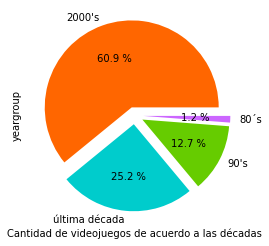

In [64]:
# Contamos los valores para cada época
games['yeargroup'].value_counts().plot(kind='pie', 
                                       figsize=(4,4), 
                                       autopct='%0.1f %%', 
                                       explode=(0.1,0.1,0.1,0.1), 
                                       colors=('#FF6600', '#00CCCC', '#66CC00', '#CC66FF'))
plt.xlabel('Cantidad de videojuegos de acuerdo a las décadas')


- Más de la mitad de los registros corresponden a videojuegos con un año de lanzamiento entre el 2000 y 2009.
- La cifra más baja, con solo un 1,3%, corresponde a los videojuegos lanzados entre el año 1980 y 1989.
- Si bien el 24,4% corresponde a la última década, debemos considerar que solo comprende 7 años, a diferencia del resto que presenta un rango de 10 años.
- En cuanto a volumen de datos (que nos permiten establecer conductas más precisas), debemos considerar descartar los que esten bajo el año 2000. 

Vamos a ver el comportamiento de los datos gráficamente pero año a año:

<AxesSubplot:title={'center':'Cantidad de videojuegos por año'}>

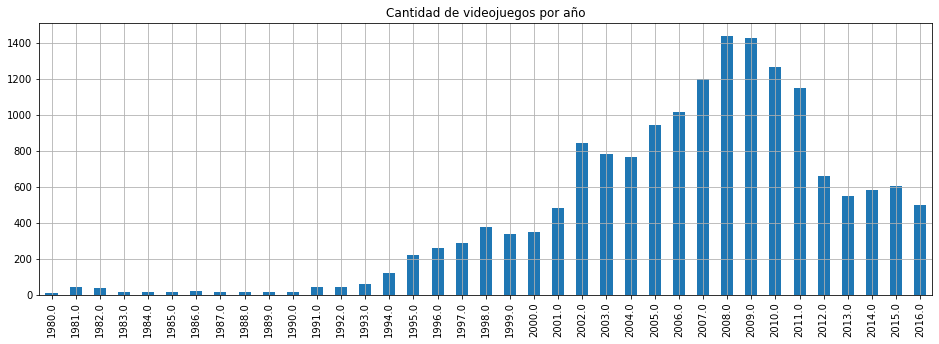

In [65]:
# Gráfico de barras de cantidad de videojuegos ordenado por año de lanzamiento
games['year_of_release'].value_counts().sort_index().plot(kind='bar', 
                                                          title='Cantidad de videojuegos por año', 
                                                          grid=True, 
                                                          figsize=(16,5))

- El gráfico de barras nos confirma que la década del 2000 es la que presenta una mayor cantidad de videojuegos.
- Desde el año 2006 al 2011 cada año cuenta con al menos 1000 videojuegos; encontrando su punto máximo en los años 2008 y 2009.
- Ya que tenemos el detalle de la última década, nos damos cuenta de que hubo una disminución considerable desde el año 2011 al 2012 (esto puede ser debido a surgimiento de nuevas plataformas).

De acuerdo a los volumenes de videojuegos por año, consideramos efectivamente que desde el año 2000 hacia adelante, contamos con valores significativos; esto es debido al gran y constante crecimiento de la industria en el lanzamiento de videojuegos lo que nos hace contar con mayor cantidad de datos y acordes a los nuevos comportamientos de los usuarios.

### Variación de ventas de acuerdo a las plataformas

Revisaremos las ventas para medir el nivel de impacto de cada plataforma. Esto nos permitirá fijar criterios en la selección de información y determinar si es relevante u no.

In [66]:
# Primero, echamos un vistazo a la tabla para ver cómo trataremos las ventas.
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,yeargroup
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2000's
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,80´s
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2000's
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2000's
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,90's


Consideramos necesario crear una nueva columna que contenga las ventas totales por videojuego. Esta nueva columna se llamará "total_sales".

#### Ventas totales por plataforma

In [67]:
# Generamos la columna total_sales y la posicionamos al final de las ventas
games.insert(8, 'total_sales', (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])) 

In [68]:
# Vemos como queda nuestra tabla
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,yeargroup
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,2000's
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,80´s
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,2000's
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,2000's
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,90's


Bien, ya que tenemos las ventas totales, ahora pasamos a agrupar los datos de acuerdo a cada plataforma.

In [69]:
# Agrupamos por plataforma y sumamos los totales
total_sales_by_platform = games.groupby('platform')['total_sales'].sum()

<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='platform'>

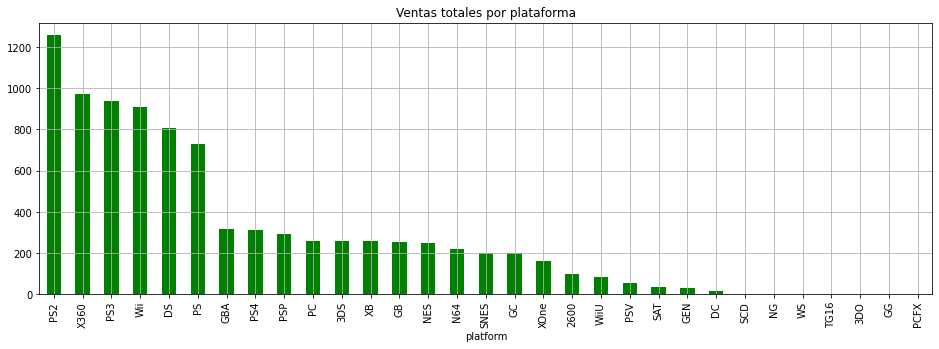

In [70]:
# Gráfico de barras de las ventas totales por plataforma
total_sales_by_platform.sort_values(ascending=False).plot(kind='bar', 
                                                          title='Ventas totales por plataforma', 
                                                          grid=True, 
                                                          figsize=(16,5),
                                                          color='green'
                                                         )


- A simple vista podemos concluir que existe una gran diferencia entre las 6 plataformas con más ventas que las demás.
- Las 6 plataformas con mayores ventas, como mínimo duplican en ventas a cualquier otra.
- La plataforma con mayores ventas, que sobrepasa los mil millones de dólares, es Playstation 2.

Nuestro ranking de plataformas líderes en venta queda de la siguiente forma:
   1. Playstation 2
   2. Xbox 360
   3. Playstation 3
   4. Nintendo Wii
   5. Nintendo DS
   6. Playstation

Ya tenemos el top de plataformas en el periodo que abarca 1980 a 2016; ahora, vamos a revisar esta misma distribución de mayores ventas pero a través de cada año.

#### Variación de ventas anual para cada plataforma

In [71]:
#Creamos una tabla para ordenar los datos
sales_by_year = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
# Reemplazamos los periodos sin ventas por 0
sales_by_year = sales_by_year.fillna(0)
# Mostramos la tabla
sales_by_year

year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.30,63.20,51.76,56.57,43.76,27.78,15.14
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Para hacer más práctica la lectura de la tabla, la graficaremos en un mapa de calor:**

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

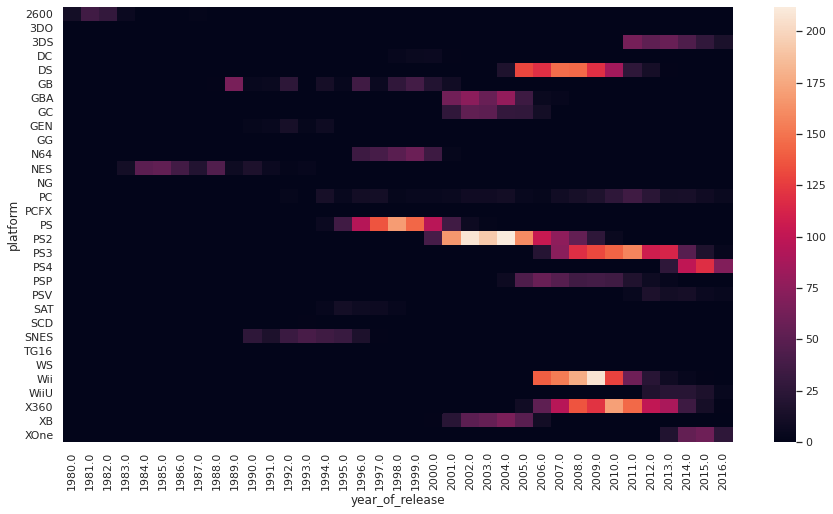

In [72]:
# Definimos el tamaño del mapa
sns.set(rc = {'figure.figsize':(15,8)})
# Graficamos
sns.heatmap(sales_by_year)


**- Considerando que mientras más alta sean las ventas, más clara será la zona del mapa, podemos decir que desde el año 2006, la escena competitiva es mayor. Esto es un factor importante a considerar para determinar características apropiadas para el éxito de un videojuego en los últimos tiempos.**

Ya que poseemos una tabla muy extensa, con datos de 31 plataformas para cada año, dividiremos a las plataformas en grupos comparables; esto es, de acuerdo a la presencia que hayan tenido por época. 

Para esto nos guiaremos por nuestra columna de "yeargroup". La plataforma será asignada al grupo en el que concentre mayor cantidad de videojuegos lanzados de acuerdo a la media.

In [73]:
# Agrupamos por plataforma y calculamos la media para cada una
platform_mean = games.groupby('platform')['year_of_release'].mean()
platform_mean

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.118677
DC      1999.942308
DS      2008.190230
GB      1995.958763
GBA     2003.216482
GC      2003.395644
GEN     1993.034483
GG      1992.000000
N64     1998.550314
NES     1987.153061
NG      1994.500000
PC      2008.924665
PCFX    1996.000000
PS      1998.005882
PS2     2004.579514
PS3     2010.830804
PS4     2015.145408
PSP     2008.729617
PSV     2014.132867
SAT     1996.028902
SCD     1993.833333
SNES    1993.845188
TG16    1995.000000
WS      2000.000000
Wii     2008.959262
WiiU    2013.659864
X360    2009.872000
XB      2003.622386
XOne    2014.951417
Name: year_of_release, dtype: float64

In [74]:
# Creamos listas para cada grupo
first_group_80_89 = []
second_group_90_99 = []
third_group_2000_2009 = []
fourth_group_2010_2016 = []

# Creamos un ciclo for para agregar a cada lista la plataforma adecuada
for i in platform_mean.index:
    if platform_mean[i] < 1989:
        first_group_80_89.append(i)
    elif platform_mean[i] < 1999:
        second_group_90_99.append(i)
    elif platform_mean[i] < 2009:
        third_group_2000_2009.append(i)
    else:
        fourth_group_2010_2016.append(i)
    

Así quedaron conformados los grupos:

In [75]:
# Primer grupo
first_group_80_89

['2600', 'NES']

In [76]:
# Segundo grupo
second_group_90_99

['3DO',
 'GB',
 'GEN',
 'GG',
 'N64',
 'NG',
 'PCFX',
 'PS',
 'SAT',
 'SCD',
 'SNES',
 'TG16']

In [77]:
# Tercer grupo
third_group_2000_2009

['DC', 'DS', 'GBA', 'GC', 'PC', 'PS2', 'PSP', 'WS', 'Wii', 'XB']

In [78]:
# Cuarto grupo
fourth_group_2010_2016

['3DS', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne']

Vamos a analizar cada grupo gráficamente:

In [79]:
# Invertimos columnas con filas para el uso en el gráfico
new_sales_by_year = sales_by_year.transpose()

In [80]:
# Nueva tabla con años de lanzamiento en el índice
new_sales_by_year.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981.0,35.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983.0,5.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Gráfico de ventas primer grupo

El primer grupo está conformado por 2600 y NES. Ambas alzanzaron su año de lanzamiento medio entre 1980 y 1989.

**1. Atari 2600 (2600)**
    - Fue el primer sistema de videojuegos en tener un gran éxito, e hizo popular los cartuchos intercambiables. Desarrollado por Atari.
    
    
**2. Nintendo Entertainment System (NES)**
    - Desarrollada por nintendo, fue la primera consola de sobremesa de esta compañía en emplear cartuchos.

Text(0.5, 0, 'Year of release')

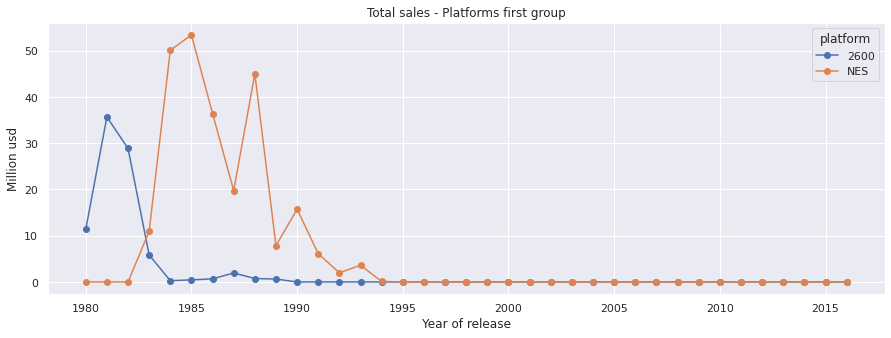

In [81]:
# Generamos el gráfico
new_sales_by_year.plot(y = first_group_80_89,
                   style='-o', 
                   title= 'Total sales - Platforms first group', 
                   grid= True, 
                   figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('Year of release')


- Ambas se reparten periodos claramente marcados; mientras que Atari 2600 triunfó en ventas desde 1980 a 1983, Nintendo lo hizo desde 1983 hasta prácticamente 1988 (lo cual se confirmará en el segundo grupo).
- Atari en solo 3 años cuadruplicó las ventas de videojuegos, pasando de 10 a 40 millones de dólares aproximadamente.
- Para 1983 Atari sufre una drástica caída y Nintendo lo sobrepasa levemente en ventas.
- En 1984 Nintendo llega a la cifra de 50 millones de dólares y en 1985 llega a su punto máximo de ventas superando levemente esa cifra.
- Luego comenzaría una época de descenso que intentó retomar el impulso de ventas hacia 1988, pero solo para volver a caer hacia 1989.


Ambas consolas fueron populares algunos años pero redujeron drásticamente sus ventas hacia fines de los años 80.

**Atari 2600** tuvo un ciclo activo de ventas desde 1980 hasta 1989; **10 años** aproximadamente, teniendo altas ventas solo los primeros 3 años.

**Nintendo (NES)** tuvo un ciclo activo de ventas desde 1983 hasta 1993; **11 años** aproximadamente, teniendo mayor solidez en venta que Atari y registrando ventas sobre los 10 millones de dólares al menos en 7 años de esos 11.

A partir de 1994 ambas prácticamente desaparecerían de la escena competitiva de plataformas.

##### Gráfico de ventas segundo grupo

El segundo grupo está conformado por plataformas con mayor cantidad de videojuegos lanzados entre el año 1990 y 1999. Lo conforman:

**1. 3DO**
    - Desarrollada por The 3DO Company y fabricada por Panasonic, Sanyo y Goldstar.
    
**2. Game Boy (GB)**
    - Consola portátil de Nintendo.
    
**3. Genesis (GEN)**
    - Conocido como Mega Drive, desarrollado por Sega.
    
**4. Game Gear (GG)**
    - Desarrollada por Sega en respuesta a la Game Boy de Nintendo.
    
**5. Nintendo 64 (N64)**
    - Desarrollada por Nintendo para suceder al Super Nintendo.
    
**6. Neo-Geo (NG)**
    - Desarrollado por SNK.
    
**7. PC-FX (PCFX)**
    - Desarrollado por NEC.
    
**8. PlayStation (PS)**
    - Desarrollada por Sony Interactive Entertainment.
    
**9. Sega Saturn (SAT)**
    - Desarrollada por Sega. Es la sucesora de Mega Drive que llegó a competir con PlayStation y Nintendo 64.
    
**10. Sega CD (SCD)**
    - Periférico de la consola Genesis (Mega Drive) que permitió almacenar datos de videojuegos en formato CD-ROM.
    
**11. Super Nintendo (SNES)**
    - Es la sucesora de la NES, desarrollada por Nintendo.
    
**12. TurboGrafx-16 (TG16)**
    - Consola desarrollada por NEC que compitió con Sega Genesis y Super Nintendo.

Text(0.5, 0, 'Year of release')

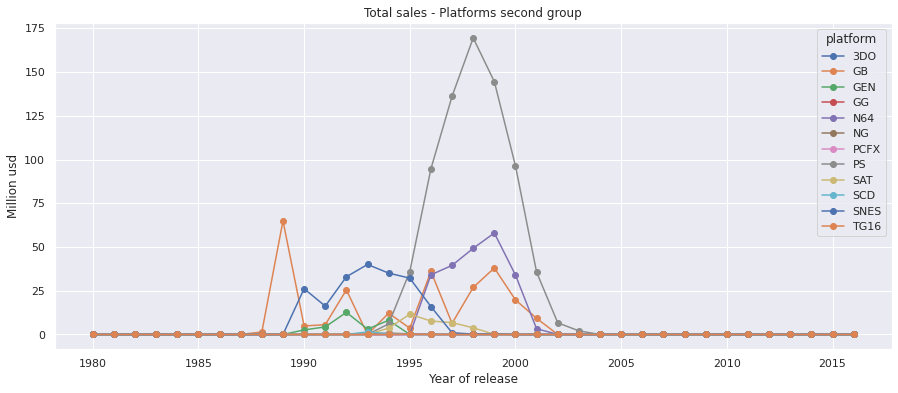

In [82]:
# Generamos el gráfico
new_sales_by_year.plot(y = second_group_90_99,
                   style='-o', 
                   title= 'Total sales - Platforms second group', 
                   grid= True, 
                   figsize=(15,6))

plt.ylabel('Million usd')
plt.xlabel('Year of release')

- Las ventas de **Game Boy** destacan en el año 1989 (año más exitoso para la consola), luego tienen una caída para mantener ciertos repuntes eventualmente hasta el año 2001; en la que destacan años como 1992, 1996, 1998 y 1999 en las que superaron las ventas de 25 millones de dólares, estando en las plataformas más exitosas hasta su fin en 2002 aproximadamente. Mantuvo su actividad durante **14 años**, de los cuales 7 años se mantuvo entre las plataformas con mayores ventas.

*Nota: En el alza de 1998 puede influir la aparición de Game Boy Color, versión mejorada de Game Boy que se lanzó por retraso de Game Boy Advance; por lo tanto, pueden estar consideradas las dos consolas en estos datos: Game Boy y Game Boy color.*


- **Super Nintendo** se destaca a partir de 1990, consolidandose como la plataforma con más ventas hasta 1995 (donde Playstation lo supera levemente). Luego comienza su decaída abrupta hasta desaparecer del escenario competitivo en 1997 y desaparecer en ventas considerables en 1999. La plataforma estuvo activa en ventas **10 años**, de los cuales 5 años fue número 1.


- **Play Station** aparece con ventas a partir de 1994, pero no es hasta 1995 cuando comienza su escalada llegando a alcanzar casi 175 millones de dólares en ventas de videojuegos para el año 1998. Luego comienza su descenso hasta alcanzar sus últimas ventas en 2003 y así desaparecer en 2004. Estuvo **10 años** activa en ventas de los cuales 6 años se mantuvo en primer lugar (a partir del año 2001 el primer lugar se lo lleva su sucesora, Play Station 2).


- **Nintendo 64** fue otra consola exitosa que alcanzó sus ventas máximas en 1999. Se vio opacada por Play Station y tuvo ventas desde 1996 hasta 2002, un periodo de **7 años**. Por lo general se mantuvo en segundo lugar en ventas, seguida de cerca por Game Boy, consola portátil de la misma compañía.

##### Gráfico de ventas tercer grupo

El tercer grupo está conformado por plataformas con mayor cantidad de videojuegos lanzados entre el año 2000 y 2009. Lo conforman:

**1. Dreamcast (DC)**
    - Desarrollada por Sega, es la sucesora directa de Sega Saturn.
    
**2. Nintendo DS (DS)**
    - Fue creada por Nintendo para suceder a la Game Boy Advance.
    
**3. Game Boy Advance (GBA)**
    - Creada por Nintendo. La versión evolucionada del Game Boy.
    
**4. GameCube (GC)**
    - Consola sucesora del Nintendo 64 desarrollada por Nintendo.
    
**5. Personal Computer (PC)**
    - El computador de escritorio propiamente tal.
    
**6. PlayStation 2 (PS2)**
    - Sucesora de Playstation, la segunda consola de sobremesa desarrollada por Sony.
    
**7. PlayStation Portable (PSP)**
    - Primera consola portátil de Sony lanzada mundialmente.
    
**8. WonderSwan (WS)**
    - Videoconsola portátil lanzada en japón. Desarrollada por Bandai.
    
**9. Nintendo Wii (Wii)**
    - Sucesora directa de GameCube. Desarrollada por Nintendo.
    
**10. Xbox (XB)**
    - Primera entrega de las videoconsolas de Xbox fabricadas por Microsoft.
    

Text(0.5, 0, 'Year of release')

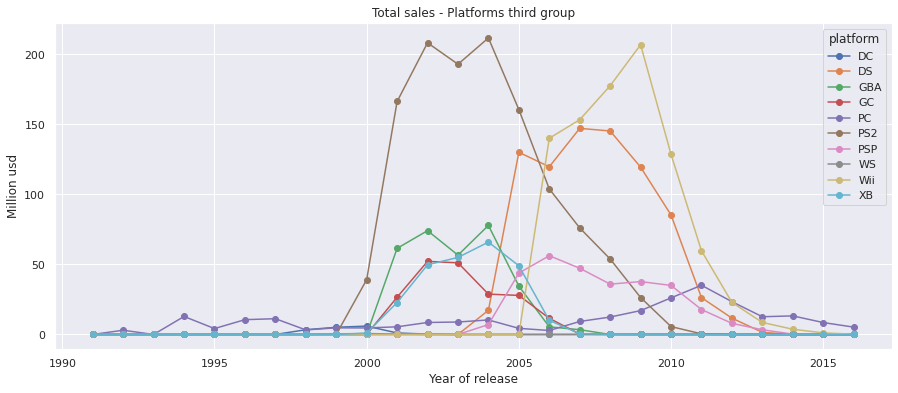

In [83]:
# Generamos el gráfico
new_sales_by_year.query('year_of_release > 1990').plot(y = third_group_2000_2009,
                                                       style='-o', 
                                                       title= 'Total sales - Platforms third group', 
                                                       grid= True, 
                                                       figsize=(15,6)
                                                      )
plt.ylabel('Million usd')
plt.xlabel('Year of release')

- Si bien para **PC** las ventas comenzaron en 1984, no es hasta 1994 cuando comienza a destacar, posicionándose en segundo lugar tras Super Nintendo. Desde ese entonces, ha tenido ventas regulares y se ha mantenido en el tiempo con leves crecidas; por ejemplo, entre 2008 y 2014 en las que sus ventas superaron los 10 millónes de dólares, llegando a un punto máximo de 35 millones para 2011. Si consideramos estas ventas constantes que superan el millón de dólares, PC lleva en carrera **23 años**. Quizás no entra en el top, pero si ha demostrado cierta estabilidad a través del tiempo.


- **PlayStation 2** toma el relevo de PlayStation 1 y ocupa su lugar como la plataforma con más ventas en 2001. Llega a superar ventas de sobre 200 millones de dólares en 2004 y 2006, lo que la convierte en la plataforma más exitosa de todos los tiempos. Solo en 2006 desciende a aproximadamente 100 millones de dólares; tercer lugar, tras Nintendo DS y Nintendo Wii. Cabe destacar que este año comienzan las ventas en videojuegos para PS3, su sucesora. La actividad de esta plataforma se mantuvo por **12 años**, de los cuales 6 años alcanzó ventas sobre los 100 millones de dólares.


- **Nintendo DS** comenzó su escalada en ventas desde 2004 para tener un fuerte alza en 2005 y así alcanzar su punto máximo en 2007 y 2008, donde alzanzó cifras cercanas a los 150 millones de dólares.Luego comenzaría su descenso en 2009 hasta 2014 donde ya no tendría ventas. Si bien tuvo un ciclo exitoso, siempre se mantuvo en segundo lugar de ventas; primero, tras Playstation 2, y luego, por detrás de Nintendo Wii. Se mantuvo activo en ventas de videojuegos por **10 años**, de los cuales 5 años mantuvo ventas sobre los 100 millones de dólares.


- **Nintendo Wii** tuvo un inicio fuerte en 2006, llegando casi a los 150 millones en ventas y superando a Playstation 2, quien ya venía de un descenso en ventas. La Wii se consagró en primer lugar hasta 2009 donde alcanzó sus ventas máximas, las cuales traspasaron los 200 millones de dólares. Luego, en 2010, comenzaría su descenso (afectado también por la entrada de Xbox 360 y PS3 que veremos más adelante) hasta ya tener muy bajas ventas los últimos años. Esta consola se ha mantenido activa en ventas desde 2006 hasta 2016 (un total de **11 años**), siendo su época de gloria entre 2006 y 2010 (5 años).


- **Otras plataformas** que podemos destacar, son: Game Boy Advance, Xbox, GameCube, PSP. Todas estas mantuvieron ventas cercanas a los 50 millones de dólares, pero se vieron opacadas por el éxito de Playstation 2 principalmente.

##### Gráfico de ventas cuarto grupo

El cuarto grupo está conformado por plataformas con mayor cantidad de videojuegos lanzados entre el año 2010 y 2016. Lo conforman:

**1. Nintendo 3DS (3DS)**
    - Es una videoconsola portátil, la sucesora de la Nintendo DS, que compitió principalmente con PlayStation Vita.
    
**2. PlayStation 3 (PS3)**
    - Es la tercera consola del modelo Playstation, desarrollada por Sony.
    
**3. PlayStation 4 (PS4)**
    - Sucesora de la Playstation 3 que fue lanzada en el año 2013.
    
**4. PlayStation Vita (PSV)**
    - Sucesora de la PSP y la última entrega del segmento portátil de Playstation.
    
**5. Wii U (WiiU)**
    - Es la sucesora de Wii que entró a competir directamente con PlayStation 4 y Xbox One.
    
**6. Xbox 360 (X360)**
    - Sucesora directa de Xbox y segunda videoconsola de sobremesa de Microsoft. Compitió con Playstation 3 y Nintendo Wii.
    
**7. Xbox One (XOne)**
    - Tercera videoconsola de Microsoft y sucesora de la Xbox 360.
 

Text(0.5, 0, 'Year of release')

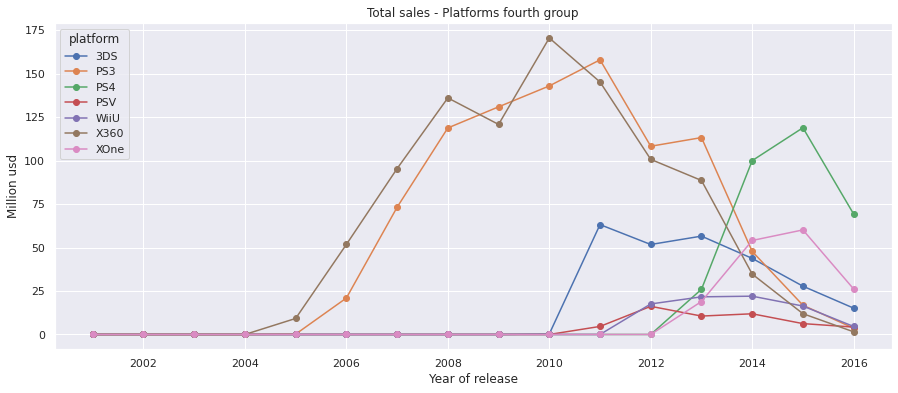

In [84]:
# Generamos el gráfico
new_sales_by_year.query('year_of_release > 2000').plot(y = fourth_group_2010_2016,
                                                       style='-o', 
                                                       title= 'Total sales - Platforms fourth group', 
                                                       grid= True, 
                                                       figsize=(15,6)
                                                      )
plt.ylabel('Million usd') 
plt.xlabel('Year of release')

- **Xbox 360** comienza a abrirse paso en 2005 para en 2007 alcanzar el tercer lugar tras Nintendo DS y Nintendo Wii. En 2010 llega a su punto más alto donde se consagra como número uno en ventas con una cifra aproximada de 175 millones de dólares. Luego comenzaría su descenso en ventas, superado en 2011 por Playstation 3, para recién en 2013 bajar de la cifra de 100 millones. Esta consola se ha mantenido por **12 años** con ventas, alcanzando cifras de más de 100 millones por 5 años.


- **Playstation 3** en 2006 asciende en ventas de forma muy similar a su competencia, Xbox 360. En 2009 logra superarlo levemente llegando a una cifra sobre los 125 millones de dólares. Luego, en 2010 pierde la competencia con Xbox 360 pero logra superar a Nintendo Wii (visto en el gráfico anterior). En 2011 alcanza el primer lugar en ventas llegando a 160 millones aproximadamente. Para 2012 comienza su descenso pero aún manteniéndose en primer lugar por este y el siguiente año (2013). Se ha mantenido con ventas por 11 años, dentro de los cuales, 6 años fueron con ventas sobre los 100 millones.


- **Playstation 4** comenzó con registros de ventas de videojuegos en 2013, tomando el primer lugar en 2014 de la mano de su antecesora, Playstation 3. En 2015 alcanzó su punto más alto en ventas con casi 120 millones de dólares. Para el 2016 experimentaría un descenso vendiendo cerca de 70 millones, pero aún manteniéndose en primer lugar de las plataformas por un amplio márgen (al menos el doble en ventas que su seguidora más cercana, Xbox One).


- **Xbox One** se mantiene en segundo lugar desde el año 2014 al 2016. Si bien comenzó con ventas en 2013, no pudo igualar el arranque que tuvo su antecesora, la Xbox 360. Sus mayores ventas las logró en 2015 llegando a 60 millones aproximadamente.


- **Nintendo 3DS** figura en tercer lugar desde su arranque en 2011. Se mantiene así hasta 2014 cuando entra Xbox One a escena por lo que pasa a cuarto lugar. Con la salida de PS3, retoma el tercer lugar desde 2015 pero manteniendo un descenso en sus ventas. Su punto más alto lo encontró en su debut en 2011, llegando aproximadamente a los 65 millones.

### Plataformas que eran populares y ahora no tienen ventas

Un indicador claro de popularidad es el nivel de ventas de los videojuegos para cada plataforma. Para esto, ya hemos creado un ranking con las ventas totales. Estaba conformado de la siguiente manera:

   1. Playstation 2
   2. Xbox 360
   3. Playstation 3
   4. Nintendo Wii
   5. Nintendo DS
   6. Playstation

Pero estas, toman el conjunto total de años desde 1980 a 2016, así que nos guiaremos por los resultados de los gráficos creados por grupo.

**¿A qué plataformas consideraremos populares?** 

*A las que hayan estado en primer lugar en ventas o al menos hayan estado cerca de ventas anuales por 50 millones de dólares.*

Durante la década de 1980 tenemos tres plataformas, cada una con periodos claros marcados:
- Atari 2600
- NES
- Game Boy

Durante la década de 1990 la competencia aumentó pero aún así solo tres pudieron resaltar.
- SNES
- Playstation
- Nintendo 64

Para la década del 2010, las ventas aumentaron en general por lo que varias compañías lograron resultados destacados:
- Playstation 2
- Nintendo Wii
- Nintendo DS
- Game Boy Advance
- Xbox
- PSP
- GameCube

En la década del 2010 siguieron los éxitos, de la mano de la sucesión natural que tuvieron algunas plataformas gracias a los avances tecnológicos.
- Xbox 360
- Playstation 3
- Playstation 4
- Nintendo 3DS
- Xbox One

**Estas han sido las plataformas populares según el criterio que fijamos (primer lugar en ventas o haber vendido aproximadamente 50 millones de dólares al menos).**

Varias de estas plataformas deben seguir actualmente con ventas activas, por lo tanto no podemos incluirlas en las plataformas exitosas que ahora no tienen ventas. Revisaremos sus últimos periodos de ganancias.

In [85]:
# Agrupamos las plataformas populares en la variable old_top_platforms
old_top_platforms = new_sales_by_year[['2600', 'NES', 'GB', 
                                       'SNES', 'PS', 'N64',
                                       'PS2', 'Wii', 'DS', 'GBA', 'XB', 'PSP', 'GC',
                                       'X360', 'PS3', 'PS4', '3DS', 'XOne']]

# Pasamos los años de lanzamiento a columnas
old_top_platforms = old_top_platforms.transpose()


Para determinar las plataformas que no tienen ventas ahora, solo debemos considerar las que sus ventas sean igual a 0 en 2016, o eliminar las plataformas que sus ventas sean mayores a 0 en 2016.

In [86]:
# Vemos las plataformas que tuvieron ganancias por ventas de videojuegos en 2016
old_top_platforms[old_top_platforms[2016] > 0][2016]

platform
Wii      0.18
X360     1.52
PS3      3.60
PS4     69.25
3DS     15.14
XOne    26.15
Name: 2016.0, dtype: float64

Estas son las plataformas que aún tenían ventas en 2016. Actualizaremos nuestra variable con las plataformas que tenían venta igual a cero en 2016.

In [87]:
# Actualizamos la variable con las que tienen venta igual a cero en 2016
old_top_platforms = old_top_platforms[(old_top_platforms[2016] == 0)]
# Mostramos las plataformas de tuvieron éxito y ahora no tienen ventas
old_top_platforms.index

Index(['2600', 'NES', 'GB', 'SNES', 'PS', 'N64', 'PS2', 'DS', 'GBA', 'XB',
       'PSP', 'GC'],
      dtype='object', name='platform')

**Nuestra lista de plataformas que eran populares y que ahora no tienen ventas queda conformada por 12 plataformas y de la siguiente manera:**

    1. Atari 2600
    2. Nintendo Entertainment System
    3. Game Boy
    4. Super Nintendo
    5. Playstation
    6. Nintendo 64
    7. Playstation 2
    8. Nintendo DS
    9. Game Boy Advance
    10. Xbox
    11. PSP
    12. GameCube

### Ciclo de vida de las plataformas

*¿Cuánto tardan en aparecer las nuevas plataformas?*
*¿Cuánto tardan en desaparecer las antiguas?*

El análisis previo mediante gráficos nos mostró un patrón que suele repetirse a través del tiempo:

- Para plataformas populares, el ciclo promedio de vida activa es de unos 10 años aproximadamente, dentro del cual, la mitad de años atraviesan por su etapa más exitosa.

Vamos a corroborar esto y extender esta información a todas las plataformas. Para esto crearemos una tabla con el ciclo de vida de las plataformas.

Tenemos que considerar que la aparición durante los últimos años ha mostrado conductas repetitivas para algunas compañías, por esto, para nuestra nueva tabla será añadida la característica de empresa desarrolladora y el tipo de plataforma (portátil o sobremesa). Estas dos características que fueron especificadas anteriormente, pueden dar conclusiones claras acerca del ciclo de vida.

In [88]:
# Creamos un nuevo dataframe
platform_lifecycle = pd.DataFrame()

# Copiamos las plataformas del dataframe "games"
platform_lifecycle['platform'] = games['platform'].unique()

# Establecemos el nombre de las plataformas como índice
platform_lifecycle = platform_lifecycle.set_index('platform')

Ya tenemos un nuevo dataframe. Ahora agregaremos información relevante en las siguientes columnas:

- **start_sales**: Año de inicio de venta de videojuegos.
- **peak_sales**: Año con mayor ganancia en ventas de videojuegos.
- **end_sales**: último año registrado con venta de videojuegos.
- **lifecycle**: Periodo activo de ventas.
- **company**: Empresa desarrolladora de la plataforma.
- **type**: Si es de sobremesa o portable.


**1. start_sales:**

In [89]:
# El ciclo for usa el índice para ir en orden desde 1980 a 2016.
# Al primer año que encuentre con un valor distinto de 0, lo establece como su punto de partida.


for j in new_sales_by_year.columns:
    for i in new_sales_by_year.index:

        if new_sales_by_year.loc[i, j] != 0:
            platform_lifecycle.loc[j, 'start_sales'] = i
            break
        

**2. peak_sales:**

In [90]:
# A diferencia del ciclo for anterior, ahora asignamos una variable "value" igual a 0.
# Esta variable se va comparando año a año hasta quedar finalmente la de valor más alto
for j in new_sales_by_year.columns:
    value = 0
    for i in new_sales_by_year.index:
        
        if new_sales_by_year.loc[i, j] > value:
            platform_lifecycle.loc[j, 'peak_sales'] = i
            value = new_sales_by_year.loc[i, j]

**3. end_sales:**

In [91]:
# Revertimos el índice usado en start_sales para encontrar el primer valor distinto de 0 desde 2016 a 1980.

for j in new_sales_by_year.columns:
    for i in new_sales_by_year.sort_index(ascending=False).index:

        if new_sales_by_year.loc[i, j] != 0:
            platform_lifecycle.loc[j, 'end_sales'] = i
            break

**4. lifecycle:**

Para calcular el ciclo activo basta con restar el año del fin de ventas al año de inicio de ventas.

In [92]:
# Creamos la nueva columna lifecycle
platform_lifecycle['lifecycle'] = (platform_lifecycle['end_sales'] - platform_lifecycle['start_sales']) + 1

# Sumamos 1 para incluir el año de inicio

**5. company / 6. type**

Agruparemos las plataformas de acuerdo a las compañías desarrolladoras y tipo de la siguiente forma:

**Nintendo:**

    - Wii, sobremesa
    - NES, sobremesa
    - GB, portátil
    - DS, portátil
    - SNES, sobremesa
    - GBA, portátil
    - 3DS, portátil
    - N64, sobremesa
    - WiiU, sobremesa
    - GC, sobremesa

*Nota: La compañía Nintendo presenta 10 plataformas de las cuales 6 son de sobremesa y 4 portátiles.*

**Sony Interactive Entertainment:**

    - PS, sobremesa
    - PS2, sobremesa
    - PS3, sobremesa
    - PS4, sobremesa
    - PSP, portátil
    - PSV, portátil

*Nota: Sony cuenta con 6 plataformas; 4 son de sobremesa y 2 son portátiles.

**Microsoft:**

    -XB, sobremesa
    -X360, sobremesa
    -XOne, sobremesa
    
    
**Sega:**

    - GEN, sobremesa
    - GG, portátil
    - SAT, sobremesa
    - SCD, periférico
    - DC, sobremesa
    
    
**NEC:**

    - TG16, sobremesa
    - PCFX, sobremesa
    
    
    
    
**Otras compañías:**

*(compañía-plataforma-tipo)*
- **Varias**, PC, escritorio y portátil
- **Atari**, 2600, sobremesa
- **Bandai**, WS, portátil
- **SNK**, NG, arcade y portátil
- **The 3DO**, 3DO, sobremesa
    
    

In [93]:
# Listas de plataformas por compañías
Nintendo = ['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'WiiU', 'GC']
Sony = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
Microsoft = ['XB', 'X360', 'XOne']
Sega = ['GEN', 'GG', 'SAT', 'SCD', 'DC']
NEC = ['TG16', 'PCFX']

# Listas para los tipos de plataforma
sobremesa = ['Wii', 'NES','SNES', 'N64', 'WiiU', 'GC', 'PS', 'PS2', 'PS3', 'PS4', 
             'XB', 'X360', 'XOne', 'GEN', 'SAT', 'DC', 'TG16', 'PCFX', '2600', '3DO']
portátil = ['GB', 'DS', 'GBA', '3DS', 'PSP', 'PSV', 'GG', 'WS']

for i in platform_lifecycle.index:
    
    if i in Nintendo:
        platform_lifecycle.loc[i, 'company'] = 'Nintendo'    
    elif i in Sony:
        platform_lifecycle.loc[i, 'company'] = 'Sony'
    elif i in Microsoft:
        platform_lifecycle.loc[i, 'company'] = 'Microsoft'
    elif i in Sega:
        platform_lifecycle.loc[i, 'company'] = 'Sega'
    elif i in NEC:
        platform_lifecycle.loc[i, 'company'] = 'NEC'
        


In [94]:
# Ciclo de vida de las plataformas
platform_lifecycle

,start_sales,peak_sales,end_sales,lifecycle,company
platform,,,,,
Wii,2006.0,2009.0,2016.0,11.0,Nintendo
NES,1983.0,1985.0,1994.0,12.0,Nintendo
GB,1988.0,1989.0,2001.0,14.0,Nintendo
DS,1985.0,2007.0,2013.0,29.0,Nintendo
X360,2005.0,2010.0,2016.0,12.0,Microsoft
PS3,2005.0,2011.0,2016.0,12.0,Sony
PS2,2000.0,2004.0,2011.0,12.0,Sony
SNES,1990.0,1993.0,1999.0,10.0,Nintendo
GBA,2000.0,2004.0,2007.0,8.0,Nintendo


**Encontramos dos problemas a simple vista:**


1. Las plataformas que siguen con ventas hasta 2016 no deberían tener un año de término de ventas. Reemplazaremos en la columna end_sales, los valores de 2016 por valores nulos.


2. Completaremos las compañías restantes(con valores nulos) que no incluímos en el ciclo for.


3. Nintendo DS tiene un año de inicio de ventas en 1985, lo que consideramos un error ya que la plataforma dio inicio recién en 2004. Revisaremos los registros de este año para esta plataforma y los eliminaremos de ser necesario.

In [95]:
# Reemplazo en end_sales
# Actualizamos los valores de lifecycle
for i in platform_lifecycle.index:
    if platform_lifecycle.loc[i, 'end_sales'] == 2016:
        platform_lifecycle.loc[i, 'end_sales'] = None

In [96]:
# Reemplazamos los nombres de las compañías faltantes
platform_lifecycle.loc['PC', 'company'] = 'Varios'
platform_lifecycle.loc['2600', 'company'] = 'Atari'
platform_lifecycle.loc['WS', 'company'] = 'Bandai'
platform_lifecycle.loc['NG', 'company'] = 'SNK'
platform_lifecycle.loc['3DO', 'company'] = 'The 3DO'

In [97]:
# Buscamos los juegos de nintendo DS de 1985
games.query('year_of_release == 1985 & platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,yeargroup
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,80´s


Tenemos el registro de solo un juego que al parecer tiene información errada. No presenta demasiada información en ventas ni en críticas así que procederemos a eliminarlo.

In [98]:
# Eliminamos a través del índice del videojuego
games.drop(15957, axis=0, inplace= True)

De acuerdo a nuestra tabla "new_sales_by_year", el año 2004 Nintendo DS comenzó sus ventas, así que cambiaremos este valor de forma manual en nuestra tabla platform_lifecycle.

In [99]:
# Reemplazamos el valor para Nintendo DS
platform_lifecycle.loc['DS', 'start_sales'] = 2004

Ahora, actualizamos el valor de la columna lifecycle para las plataformas que aún siguen activas (las que tenían asignado el año 2016 en ed_sales.

In [100]:
# Actualizamos los valores de lifecycle
for i in platform_lifecycle.index:
    if pd.isna(platform_lifecycle.loc[i, 'end_sales']) == True:
        platform_lifecycle.loc[i, 'lifecycle'] = None

In [101]:
# Actualizamos el valor lifecycle del valor que cambiamos para nintendo DS
platform_lifecycle['lifecycle'] = (platform_lifecycle['end_sales'] - platform_lifecycle['start_sales']) + 1

In [102]:
# Nuestra tabla con correcciones listas
platform_lifecycle

,start_sales,peak_sales,end_sales,lifecycle,company
platform,,,,,
Wii,2006.0,2009.0,NaN,NaN,Nintendo
NES,1983.0,1985.0,1994.0,12.0,Nintendo
GB,1988.0,1989.0,2001.0,14.0,Nintendo
DS,2004.0,2007.0,2013.0,10.0,Nintendo
X360,2005.0,2010.0,NaN,NaN,Microsoft
PS3,2005.0,2011.0,NaN,NaN,Sony
PS2,2000.0,2004.0,2011.0,12.0,Sony
SNES,1990.0,1993.0,1999.0,10.0,Nintendo
GBA,2000.0,2004.0,2007.0,8.0,Nintendo


**Con esta tabla ya podemos responder las preguntas que planteamos en un comienzo:**

*¿Cuánto tardan en aparecer las nuevas plataformas? ¿Cuánto tardan en desaparecer las antiguas?*

In [103]:
platform_lifecycle['lifecycle'].median()

8.5

Si calculamos la media de las plataformas desde que inician sus ventas hasta que finalizan, tenemos que la duración media es de **7 años y medio** aproximadamente. Pero, *¿será realmente precisa esta apreciación?*

Veamos el ciclo de vida de las plataformas de acuerdo a la compañía que pertenecen:

In [104]:
# Pasamos los valores del índice a una nueva columna
platform_lifecycle = platform_lifecycle.reset_index()
# Agrupamos por plataforma y compañía
platform_lifecycle.groupby(['platform', 'company'])['lifecycle'].median()

platform  company  
2600      Atari        10.0
3DO       The 3DO       2.0
3DS       Nintendo      NaN
DC        Sega         11.0
DS        Nintendo     10.0
GB        Nintendo     14.0
GBA       Nintendo      8.0
GC        Nintendo      7.0
GEN       Sega          5.0
GG        Sega          1.0
N64       Nintendo      9.0
NES       Nintendo     12.0
NG        SNK           4.0
PC        Varios        NaN
PCFX      NEC           1.0
PS        Sony         10.0
PS2       Sony         12.0
PS3       Sony          NaN
PS4       Sony          NaN
PSP       Sony         12.0
PSV       Sony          NaN
SAT       Sega          6.0
SCD       Sega          2.0
SNES      Nintendo     10.0
TG16      NEC           1.0
WS        Bandai        3.0
Wii       Nintendo      NaN
WiiU      Nintendo      NaN
X360      Microsoft     NaN
XB        Microsoft     9.0
XOne      Microsoft     NaN
Name: lifecycle, dtype: float64

Debemos considerar que varias plataformas tuvieron una aparición fugaz y no se sostuvieron mucho en el tiempo, además de plataformas que aún siguen activas.

De acuerdo a lo estudiado, nos damos cuenta que los ciclos de aparición están relacionados a la evolución que va teniendo una misma compañía en base a la competencia que se vaya dando. En este sentido, de acuerdo a la lista con plataformas más populares, podemos determinar que Nintendo y Sony son las compañías más populares, estables y que tienen un ciclo de rotación activo hasta el día de hoy en sus consolas.

En base a estas conclusiones, lo idóneo sería comparar los ciclos de vida en estas compañías para ser más precisos en los años en que tardan en aparecer y desaparecer nuevas plataformas.  

In [105]:
# Observamos el ciclo de vida de acuerdo a las distintas compañías
platform_lifecycle.groupby('company')['lifecycle'].median()

company
Atari        10.0
Bandai        3.0
Microsoft     9.0
NEC           1.0
Nintendo     10.0
SNK           4.0
Sega          5.0
Sony         12.0
The 3DO       2.0
Varios        NaN
Name: lifecycle, dtype: float64

En base a la popularidad que hemos estudiado, podemos determinar que las plataformas principales tienen un ciclo bastante similar: **entre 9 y 12 años aproximadamente.** Por lo tanto, este sería el tiempo en que tardan en desaparecer una vez que comienzan con ventas.

Ahora analicemos el caso particular de Nintendo y Sony:

Text(0.5, 0, 'year of release - games')

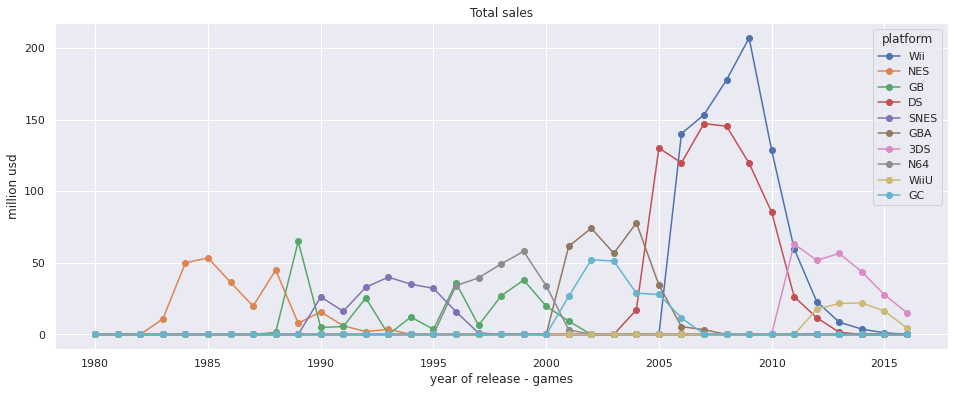

In [106]:
# Generamos el gráfico
new_sales_by_year[Nintendo].plot(style='-o', 
                       title= 'Total sales', 
                       grid= True, 
                       figsize=(16,6)
                      )
plt.ylabel('million usd')
plt.xlabel('year of release - games')

En el caso de Nintendo, sigamos la sucesión para plataformas de sobremesa:
- NES decae fuertemente para 1989 pero para 1990 ya aparece SNES.
- Hacia 1994, SNES comienza un leve descenso en ventas para desaparecer en 1997, pero ya estaba presente N64 desde 1996.
- Para el 2000, N64 tuvo una baja en ventas que ya presagiaba su desaparición. Luego, en 2001 aparece GC en el mercado.
- Nintendo Wii aparece destacadamente en 2006 luego del descenso en ventas de GC desde 2004.
- WiiU aparece en 2012 luego del gran descenso en ventas de Wii desde 2010.


Dadas estas características, el patrón que sigue la compañía Nintendo es muy similar para las plataformas de sobremesa: **desde el decaímiento en ventas, solo tarda aproximadamente 1 año en aparecer una nueva plataforma.**

*Nota: Este comportamiento también puede ocurrir debido a la información que manejen los usuarios. Al enterarse de que una nueva consola está en desarrollo, pueden disminuir las ventas de una plataforma más antigua.*

**Desde que aparece una nueva plataforma, su precedesora tarda aproximadamente dos años en desaparecer.**


Para las plataformas portátiles(GB, GBA, DS y 3DS) el comportamiento es exactamente el mismo.


**Veamos ahora lo que ocurre con Sony:**

Text(0.5, 0, 'year of release - games')

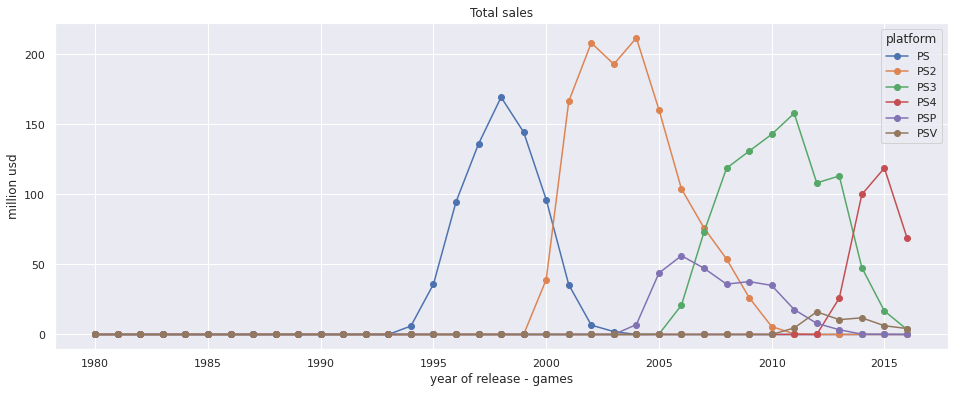

In [107]:
# Generamos el gráfico
new_sales_by_year[Sony].plot(style='-o', 
                       title= 'Total sales', 
                       grid= True, 
                       figsize=(16,6)
                      )
plt.ylabel('million usd')
plt.xlabel('year of release - games')

A simple vista, el comportamiento de las plataformas de Sony es muy similar a las de Nintendo. Luego de alcanzar su pico en ventas, ante el decaimiento, rápidamente surge una nueva plataforma que asciende rápidamente sus ventas.

   - PS comienza a decaer en 1999 y ya para el año 2000 PS2 hace presencia. Luego, PS tarda unos 3 años en desaparecer.
   - PS2 comienza su descenso en ventas para 2005 y ya en 2006 vemos a PS3 en acción. PS2 tardó un poco más en desaparecer (4 años); esto puede ser debido a sus altos picos de ventas y su consolidación como la plataforma más popular.
   - Para 2012 comienza la caída de PS3 y en 2013 aparece PS4 en escena.

En cuando a portátiles, PSP comienza a descender sus ventas de forma sostenida en 2007. 4 años más tarde recién aparecería otra consola portable, PSV. Ambas no alcanzarían los picos de ventas que lograron las plataformas de sobremesa.

De acuerdo a lo observado para esta compañía, tenemos que los **ciclos de aparición de una nueva plataforma son de 1 año a partir del momento en que la predecesora decae en ventas.** A su vez, la desaparición de estas tarda aproximadamente 3 años; un poco más que las últimas consolas de Nintendo.


**En base a toda la información recabada con los gráficos y tabla de ciclo de vida, podemos estimar que:**
* Las plataformas nuevas tardan 1 año en aparecer.
* Las plataformas antiguas tardan de 2 a 3 años en desaparecer.
* El ciclo medio de vida de las plataformas es de aproximadamente 10 años.

### Datos con los que trabajaremos

Necesitamos determinar patrones que nos indiquen el éxito de un videojuego pero que sea acorde a la actualidad. 

Para generar datos acordes al 2017 deberiamos tomar en cuenta algunas de las características que observamos hasta ahora:

1. Las plataformas que han sido populares a través del tiempo.
2. Plataformas activas con ventas actualmente.
3. Ciclo de vida de las plataformas, considerando nuevas apariciones.

Recordemos un poco las plataformas que determinamos como populares:

    1. Atari 2600
    2. Nintendo Entertainment System
    3. Game Boy
    4. Super Nintendo
    5. Playstation
    6. Nintendo 64
    7. Playstation 2
    8. Nintendo DS
    9. Game Boy Advance
    10. Xbox
    11. PSP
    12. GameCube
    
De esta lista tenemos que considerar que hay compañías a las que hay que prestarles mayor atención y que siguen vigentes actualmente:

 - Nintendo
 - Sony
 - Microsoft

**Pasamos a observar las plataformas activas actualmente:**

In [108]:
# Filtramos de acuerdo a dos condiciones. Plataformas de año 2016 que tengan ventas totales mayores a 0.
games.query('year_of_release == 2016 & total_sales> 0')['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

En base a las compañías que mencionamos anteriormente y las plataformas activas actualmente, podemos clasificar de la siguiente forma:

    Nintendo:
        - Wii
        - WiiU
        - 3DS
    Sony:
        - PS3
        - PS4
        - PSV
    Microsoft:
        - X360
        - XOne
    Otros:
        - PC

- Si consideramos solo las plataformas activas el último tiempo, estaríamos dejando fuera de análisis a gran parte de las consolas que han sido populares. Pero, consideramos que gran parte de ellas han visto su sucesión natural en estas últimas plataformas.


- Debemos considerar el ciclo de vida promedio de 10 años, por lo tanto sería adecuado estudiar al menos los videojuegos desde el año 2006 que son los que aún pueden seguir activos con ventas.


- De acuerdo al mapa de calor, también podemos ver una alta competencia en ventas para las distintas plataformas a partir del año 2006.


Pero, de considerar datos desde el año 2006, estaríamos considerando un largo periodo comparable a toda la vida útil de una plataforma; tendríamos datos que desvíen nuestra atención y hasta tendríamos plataformas que ya están obsoletas.


Veamos un ciclo más corto y en que las plataformas alcanzan su peak de ventas (lo cual podríamos considerar como el último peak exitoso para las compañías):

- Exploraremos las plataformas que han estado activas desde el año 2006.
- Analizaremos los picos de venta desde el 2006 al 2016.

In [109]:
# Plataformas activas desde 2006
platforms_since_2006 = games.query('year_of_release > 2006 & total_sales> 0')['platform'].unique()
platforms_since_2006

array(['Wii', 'X360', 'PS3', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PSP', 'PS2', 'PSV', 'GBA', 'XB', 'GC', 'DC'], dtype=object)

Text(0.5, 0, 'Year of release')

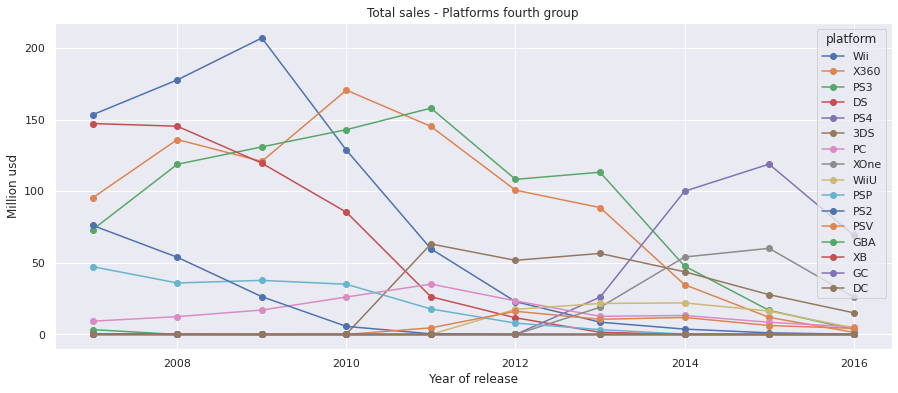

In [110]:
# Generamos el gráfico
new_sales_by_year.query('year_of_release >2006').plot(y=platforms_since_2006, style='-o', 
                       title= 'Total sales - Platforms fourth group', 
                       grid= True, 
                       figsize=(15,6)
                      )
plt.ylabel('Million usd')
plt.xlabel('Year of release')

- El último pico de ventas registrado corresponde a PS4 en el año 2015.


- Se puede apreciar un punto de inflexión desde el año 2012 aproximadamente. En este punto tanto PS4 como XOne comienzan su crecimiento en ventas. Por otro lado, Nintendo viene de un decaimiento considerable desde el 2009 con Wii y 2011 con GBA.

**Basados en el último punto de comienzo de crecimiento para las plataformas, consideramos que debemos generar pronósticos para el 2017 en base a los datos desde el año 2012 en adelante. A partir de esta época, se generan nuevas crecidas de ventas lo cual podría explicar el comportamiento y preferencias de los usuarios en la actualidad.**

In [111]:
# Creamos un nuevo dataset con los videojuegos a partir del año 2000
next_gen_games = games.query('year_of_release >= 2012')
next_gen_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2897 non-null   object 
 1   platform         2897 non-null   object 
 2   year_of_release  2897 non-null   float64
 3   genre            2897 non-null   object 
 4   na_sales         2897 non-null   float64
 5   eu_sales         2897 non-null   float64
 6   jp_sales         2897 non-null   float64
 7   other_sales      2897 non-null   float64
 8   total_sales      2897 non-null   float64
 9   critic_score     1320 non-null   float64
 10  user_score       1590 non-null   float64
 11  rating           1773 non-null   object 
 12  yeargroup        2897 non-null   object 
dtypes: float64(8), object(5)
memory usage: 316.9+ KB


**Disminuímos de 16712 a 2897 los registros. Mediante esta segmentación podremos obtener información precisa para la toma de decisiones de cara a el próximo año.**

### Plataformas líderes en ventas

Ya con nuestros nuevos datos, exploraremos las que mantienen el liderazgo en ventas y que son potencialmente rentables para nosotros.

In [112]:
# Agrupamos por plataforma y sumamos las ventas totales
next_gen_games.groupby('platform')['total_sales'].sum().sort_values(ascending= False).head()

platform
PS4     314.14
PS3     289.70
X360    237.52
3DS     195.01
XOne    159.32
Name: total_sales, dtype: float64

Estas son las plataformas líderes en ventas desde el año 2012. Playstation 4 lidera seguida por Playstation 3.

Debemos considerar que plataformas como X360 y PS3 ya están en su etapa final de vida, por lo tanto no presentan rentabilidad para nosotros. Veremos gráficamente las plataformas que puedan representar altas ventas o un ascenso en los últimos años.

In [113]:
# Creamos una tabla para agrupar las ventas según plataforma
next_gen_sales = next_gen_games.pivot_table(index='platform', columns='year_of_release', 
                                            values='total_sales', aggfunc='sum')

# Reemplazamos los periodos sin ventas por 0
next_gen_sales = next_gen_sales.fillna(0)

# Cambiamos los años al índice
next_gen_sales = next_gen_sales.transpose()

# Mostramos la tabla
next_gen_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.76,11.67,23.45,108.27,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013.0,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Text(0.5, 0, 'year of release - games')

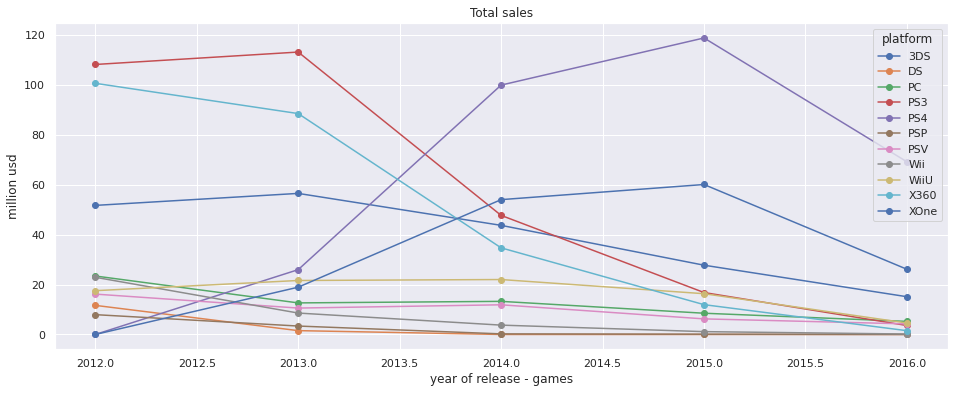

In [114]:
# Graficamos las ventas de los últimos años
next_gen_sales.plot(style='-o', title= 'Total sales', grid= True, figsize=(16,6)
                      )
plt.ylabel('million usd')
plt.xlabel('year of release - games')

Desde el 2014 en adelante, PS4 se mantiene líder en ventas. Si bien en 2016 muestra una caída, lo mismo pasa para las demás, lo cual pueda suponer que se trate por recopilación de datos en una instancia final.

**De seguir el comportamiento de años anteriores, podemos pronosticar que para 2017:**

   - PS4 debería seguir en alza hasta encontrar su peak en años venideros.
    
    
   - Debido al comienzo en 2013 y su curva de alza, XOne podría seguir aumentando sus ventas pero no con el potencial que ha alcanzado PS4.
    
    
   - PSP prácticamente podría desaparecer en ventas para 2017, lo mismo que para otras plataformas que ya vienen de experimentaar un recambio generacional, como lo son: PS3, X360 y Wii.
    
    
   - Si bien, por parte de Nintendo las plataformas más nuevas son WiiU y 3DS, vienen de arrastrar una baja en ventas que difícilmente retomen forma al alza de cara a los próximos años.


**Las plataformas potencialmente rentables para 2017 deberían ser Playstation 4 y Xbox One.**

Las demás plataformas experimentan leves bajas sostenidas en el tiempo y difícilmente cambien su curva de ventas. 

*Nota: Hay que poner especial atención al desarrollo de Nintendo en los próximos años ya que presenta una baja en ventas tanto en su plataforma de sobremesa WiiU como su plataforma portátil 3DS; a lo que podría responder con un lanzamiento de una nueva plataforma prontamente. 

### Diferencias en ventas globales por plataforma

Con el objeto de profundizar y entender las ventas globales, mediante diagramas de caja mostrarémos las diferencias entre distintas plataformas.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

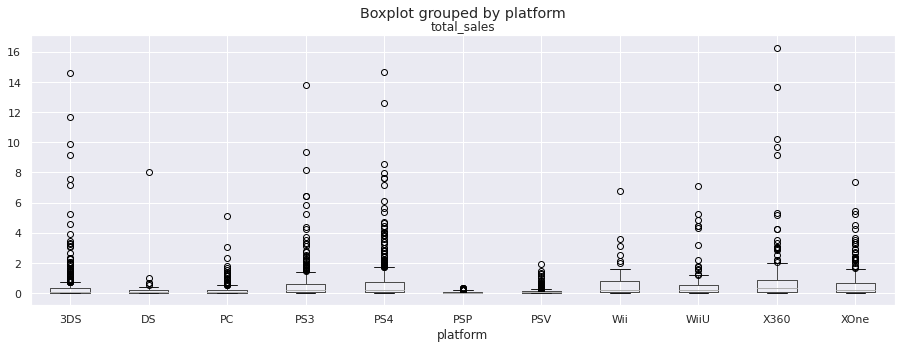

In [115]:
# Creamos los diagramas de cajas
next_gen_games.query('total_sales <20').boxplot(column='total_sales', by='platform', grid=True, figsize=(15,5))

En este gráfico consideramos las ventas hasta 20 millones de dólares. Podemos apreciar varios casos puntuales de ventas altas para ciertos videojuegos. Principalmente estos casos de altas ventas se notan en las siguientes plataformas:

     - Nintendo: 3DS.
     - Playstation: PS3 Y PS4.
     - Microsoft: X360, XOne.
     
Veremos ahora con más detalle donde se encuentran acumuladas gran parte de las ventas, bajo los 2,5 millones de dólares:

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

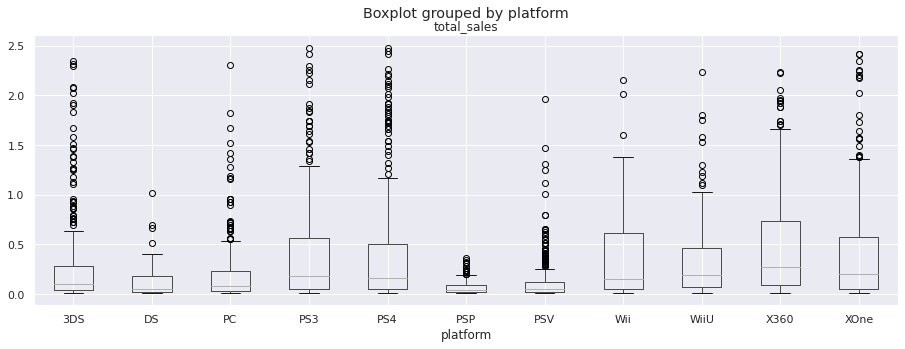

In [116]:
# Creamos los diagramas de cajas
next_gen_games.query('total_sales <2.5').boxplot(column='total_sales', by='platform', grid=True, figsize=(15,5))

   - La media de ventas en general oscila cercana a los 250 mil dólares.
   
   - Las ventas representan una distribución de caja similar. X360 presenta márgenes más altos en promedio, seguido de Wii, XOne y luego las plataformas de Playstation.
   
**Para concluir la observación del diagrama de cajas, estimamos que no existe una diferencia significativa en la media de ventas de la plataforma ya que gran parte de sus videojuegos generan ganancias cercanas a los 250 mil dólares. La diferencia en el éxito de ventas está marcada por los valores atípicos; es decir, títulos específicos de videojuegos que arrastran más ventas. Esto se puede apreciar en las altas ventas atípicas de videojuegos en PS4.**
   

### Influencia de la opinión de usuarios y expertos

Los videojuegos siempre son sometidos a evaluaciones que pueden afectar la decisión de compra. Estas calificaciones pueden ser tanto a nivel de un jugador normal como de crítica especializada. 

**Exploraremos el nivel de influencia que pueden llegar a alcanzar estas opiniones y su incidencia directa en el éxito de un videojuego.**

Para comenzar con nuestro análisis elegiremos una plataforma popular en la que veremos la relación entre las reseñas y el nivel de ventas. La plataforma escogida se someterá a comparaciones de acuerdo al nivel de ventas para un mismo título; por esto, es necesario escoger una plataforma que presente los mismos títulos para otra plataforma importante.

De acuerdo a nuestro estudio, esto se cumpliría para las plataformas de última generación: PS4, XOne y WiiU. Estas tres pertenecen a las compañías que presentan mejor competencia durante la última década, pero ¿será buena idea comparar sus títulos considerando que recién están comenzando sus ventas?

Para sacar conclusiones más robustas haremos el análisis con plataformas que ya han mermado sus ventas y que de todas formas pertenecen a la competencia de los últimos años. **Evaluaremos la crítica en PS3, para luego comparar las ventas de algunos de sus competidores: X360 y Wii.**


#### Relación de la crítica especializada en el nivel de ventas para PS3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Critic Score')

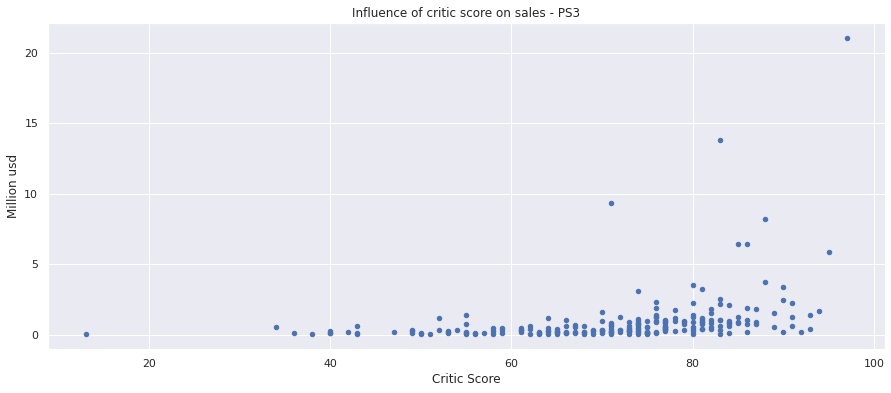

In [117]:
# Filtramos por PS3 y generamos un gráfico de dispersión.
next_gen_games.query('platform == "PS3"').plot(x='critic_score', 
                                               y='total_sales',
                                               kind='scatter',
                                               title='Influence of critic score on sales - PS3',
                                               grid=True,
                                               figsize=(15,6))
plt.ylabel('Million usd')
plt.xlabel('Critic Score')

- El gráfico de dispersión para videojuegos de PS3 nos muestra que existe una relación positiva entre el nivel de ventas y la puntuación de la crítica.


- Esta relación se hace notar por sobre la puntuación de 70, donde comienzan a aparecer ciertos videojuegos que destacan de la media de ventas. 


- Ya sobre la puntuación de 80 se producen muchos más casos de ventas sobre los 5 millones de dólares por juego, existiendo algunos casos que bordean los 15 millones.


- En la crítica sobre 90 ya vemos una menor cantidad de videojuegos, pero todos con ventas sobre la media y un caso particular que sobrepasa los 20 millones de dólares.

**Por lo tanto, podemos decir que si existe una relación. Mientras mejor sea la puntuación de la crítica, es esperable que tenga ventas más altas. Si la crítica es sobre los 90, es casi seguro que superará en ventas a gran parte de los videojuegos.**

#### Relación de la calificación de usuarios  en el nivel de ventas para PS3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'User Score')

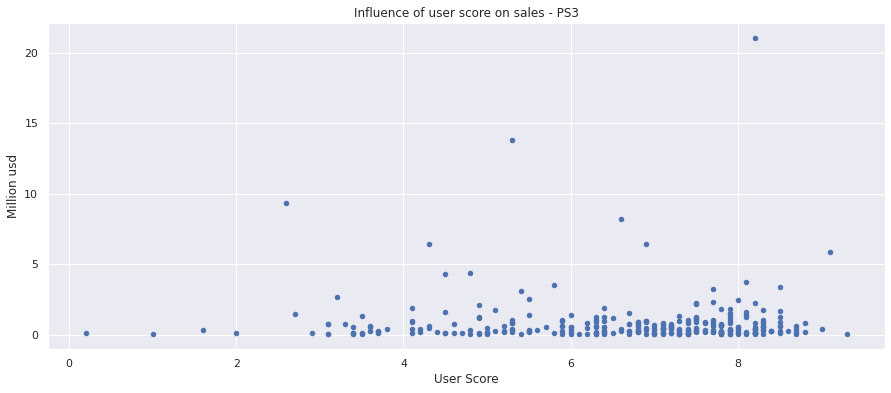

In [118]:
# Filtramos por PS3 y generamos un gráfico de dispersión.
next_gen_games.query('platform == "PS3"').plot(x='user_score', 
                                               y='total_sales',
                                               kind='scatter',
                                               title='Influence of user score on sales - PS3',
                                               grid=True,
                                               figsize=(15,6))
plt.ylabel('Million usd')
plt.xlabel('User Score')

- En el gráfico de dispersión para videojuegos de PS3, podemos ver la relación de la puntuación de los usuarios y las ventas. No existe una relación positiva clara como en la puntuación de la crítica.

- Si bien en la medida que hay una mayor puntuación comienzan a aparecer más casos de videojuegos con altas ventas, existen excepciones de una baja puntuación y altas ventas.

- Gran parte de las ventas más altas se encuentran en torno a la puntuación de 8, incluyendo una que supera los 20 millones de dólares.

**De acuerdo a lo observado, podemos concluír que la puntuación de los usuarios no es tan determinante como la de la crítica. Si bien es natural que las puntuaciones más altas presenten más ventas en general, no siempre es el caso. Existen videojuegos con baja o media puntuación de los usuarios pero con ventas considerables.**

#### Correlación entre las reseñas y las ventas

Confirmarémos lo observado anteriormente mediante una matriz de correlación:

In [119]:
# Matriz de correlación para los videojuegos de PS3
next_gen_games.query('platform == "PS3"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.176487,-0.127877,-0.132418,-0.143187,-0.159205,-0.165646,-0.239265
na_sales,-0.176487,1.000000,0.842717,0.370129,0.896170,0.939296,0.342897,-0.026106
eu_sales,-0.127877,0.842717,1.000000,0.382227,0.981762,0.970812,0.308131,-0.029754
jp_sales,-0.132418,0.370129,0.382227,1.000000,0.392715,0.463610,0.175208,0.171135
other_sales,-0.143187,0.896170,0.981762,0.392715,1.000000,0.985994,0.315044,-0.009211
total_sales,-0.159205,0.939296,0.970812,0.463610,0.985994,1.000000,0.334018,-0.010778
critic_score,-0.165646,0.342897,0.308131,0.175208,0.315044,0.334018,1.000000,0.544587
user_score,-0.239265,-0.026106,-0.029754,0.171135,-0.009211,-0.010778,0.544587,1.000000


**Si observamos la relación de las ventas totales con la puntuación de crítica y usuarios, tenemos lo siguiente:**

   - La correlación entre las ventas y la crítica es de 0.40. Es una relación positiva pero no demasiado fuerte.
    
   - La correlación entre las ventas y la puntuación de usuarios es de 0.12. Es levemente positiva y bastante débil como para definir que es un factor relevante en las ventas.
    
**Otros comportamientos interesante se dan a nivel de regiones:**

- La crítica es un factor más relevante en Norteamérica teniendo un factor de correlación de 0.42.

- La puntuación de los usuarios puede influír un poco más en los usuarios de Japón, donde el factor de correlación es de 0.17. Aún así es demasiado débil.



**Queda confirmado entonces que la crítica presenta un factor de influencia mayor al de la puntuación de usuarios. Si bien, una puntuación de crítica alta no asegura buen nivel de ventas, puede ser un factor a tomar en cuenta para la compra de videojuegos, sobretodo si la puntuación es cercana a los 90 puntos.**

#### Relación de videojuegos similares para distintas plataformas

Comenzamos buscando los mismos videojuegos presentes en estas tres plataformas: PS3, X360 y Wii.

In [120]:
# Creamos una variable solo para los datos que necesitamos
ps3_x360_wii = next_gen_games.query('platform == "PS3" or platform == "X360" or platform == "Wii"')

# Contamos la cantidad de juegos para cada título
ps3_x360_wii['name'].value_counts()

Just Dance 4                          3
Skylanders: SuperChargers             3
Skylanders Giants                     3
Major League Baseball 2K12            3
Monster High: New Ghoul in School     3
                                     ..
Muv-Luv Alternative: Total Eclipse    1
Mugen Souls                           1
Dream C Club                          1
Marvel Avengers: Battle for Earth     1
Tales of Zestiria                     1
Name: name, Length: 556, dtype: int64

Todos los videojuegos que están 3 veces, es debido a que están en cada una de las plataformas que necesitamos. Vamos a dejar solo estos títulos para el análisis.

In [121]:
# Creamos un dataframe a partir de la contabilización de juegos
df_selected_games = pd.DataFrame(ps3_x360_wii['name'].value_counts())
# Filtramos por solo los que tienen 3 veces el mismo videojuego
df_selected_games = df_selected_games.query('name == 3')
# Asignamos los nombres a una variable
selected_games = df_selected_games.index
selected_games

Index(['Just Dance 4', 'Skylanders: SuperChargers', 'Skylanders Giants',
       'Major League Baseball 2K12', 'Monster High: New Ghoul in School',
       'Angry Birds Star Wars', 'Just Dance 2017',
       'LEGO Batman 2: DC Super Heroes', 'Just Dance 2015', 'Just Dance 2014',
       'Skylanders SWAP Force', 'The Smurfs 2', 'Madden NFL 13',
       'The Amazing Spider-Man (Console Version)',
       'Epic Mickey 2: The Power of Two', 'LEGO Harry Potter: Years 5-7',
       'LEGO The Lord of the Rings', 'How to Train Your Dragon 2', 'WWE '13',
       'Just Dance 2016', 'FIFA 15', 'Turbo: Super Stunt Squad',
       'Disney Infinity', 'Skylanders: Trap Team', 'Pro Evolution Soccer 2013',
       'Young Justice: Legacy', 'NBA 2K13', 'FIFA Soccer 13', 'FIFA 14'],
      dtype='object')

Tenemos una lista de 267 juegos que se repiten 3 veces. Ahora filtramos nuestra lista de acuerdo a estos:

In [122]:
ps3_x360_wii.query('name in @selected_games').sort_values(by='name').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,yeargroup
6443,Angry Birds Star Wars,Wii,2013.0,Strategy,0.15,0.09,0.0,0.02,0.26,NaN,2.8,E,última década
6217,Angry Birds Star Wars,X360,2013.0,Strategy,0.16,0.10,0.0,0.02,0.28,59.0,5.6,E,última década
6047,Angry Birds Star Wars,PS3,2013.0,Strategy,0.10,0.14,0.0,0.05,0.29,49.0,3.6,E,última década
2119,Disney Infinity,PS3,2013.0,Action,0.49,0.32,0.0,0.16,0.97,75.0,5.9,E10+,última década
1330,Disney Infinity,X360,2013.0,Action,0.97,0.34,0.0,0.13,1.44,74.0,6.5,E10+,última década


Tenemos 801 juegos en total, lo que calza perfecto de acuerdo a nuestras condiciones ya que es el triple de 267, el número de nuestra lista de juegos seleccionados.

Veamos ahora la diferencia de ventas considerando que tenemos los mismos videojuegos

Text(0.5, 0, 'Platform')

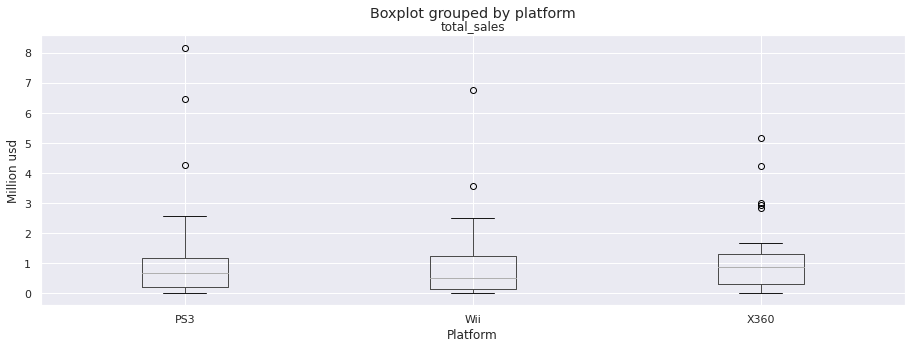

In [123]:
# Diferencias en ventas para los mismos videojuegos en 3 plataformas distintas
ps3_x360_wii.query('name in @selected_games').boxplot(column='total_sales', by='platform', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('Platform')

A simple vista se ve una distribución similar. Existen valores atípicos más altos para X360 y luego PS3. Veamos con más detalle el gráfico:

Text(0.5, 0, 'Platform')

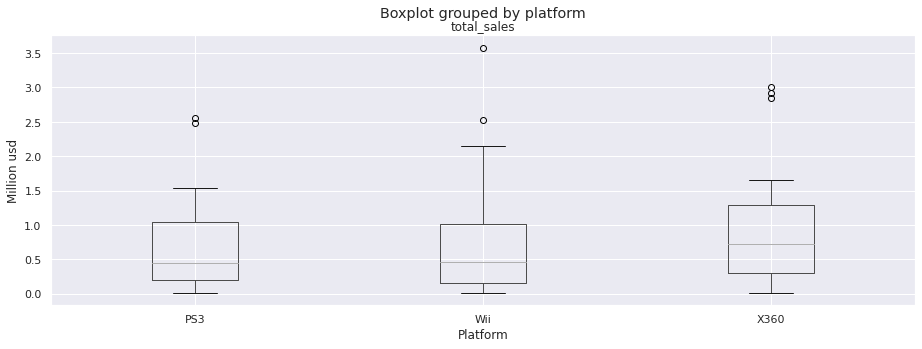

In [124]:
# Diferencias en ventas para los mismos videojuegos en 3 plataformas distintas
ps3_x360_wii.query('name in @selected_games and total_sales < 4').boxplot(column='total_sales', by='platform', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('Platform')

Para el mismo grupo de videojuegos en 3 plataformas distintas, el nivel de ventas es muy similar:

   - Los tres mantienen casi la misma media.
   - Sus cuartiles comprenden casi el mismo alcance de millones de dólares alcanzados, siendo levemente más alto para PS3.
   - La única diferencia se puede apreciar en unos pocos valores atípicos.
    
**En conclusión, el grupo de 267 videojuegos lanzados para las plataformas PS3, X360 y Wii mantienen niveles de ventas muy similares. La puntuación de la crítica y de los usuarios puede ser influyente para todas las plataformas por igual. Se observan leves diferencias en algunos valores atípicos, pero esto puede ser por factores externos a los videojuegos propiamente tal, como por ejemplo, el alcance y costo de la plataforma para los usuarios.**

### Influencia del género en las ventas

Volvemos a analizar nuestros datos para plataformas desde el año 2000 en adelante. Ahora veremos la importancia del género en las ventas. Para esto mostraremos mediante diagramas de cajas el nivel de ventas para cada género:

Text(0.5, 0, 'Genre')

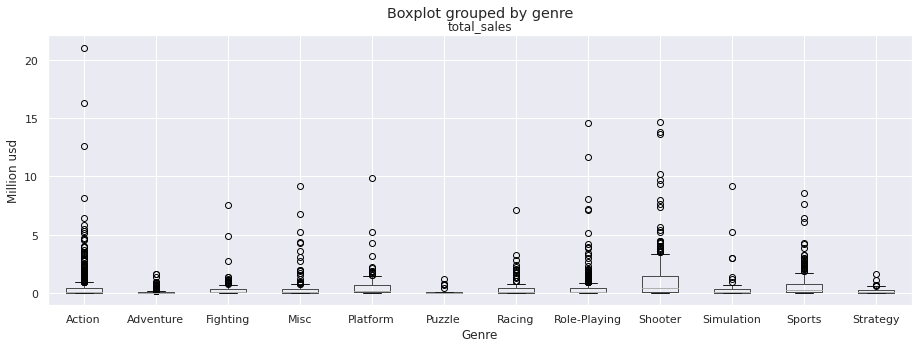

In [125]:
# Diagrama de caja para las ventas totales de acuerdo al género
next_gen_games.boxplot(column='total_sales', by='genre', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('Genre')

- Existe la presencia de valores atípicos relevantes en géneros como shooter, acción y role-playing.

Nos enfocaremos en las cajas propiamente tal para ver el nivel de ventas en las que se concentran la mayoría de videojuegos:

Text(0.5, 0, 'Genre')

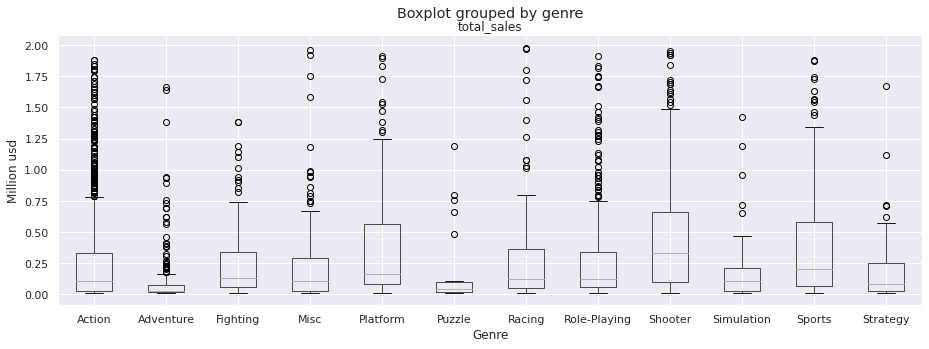

In [126]:
# Diagrama de caja para las ventas totales de acuerdo al género
next_gen_games.query('total_sales < 2').boxplot(column='total_sales', by='genre', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('Genre')

- Todos los géneros presentan una media similar salvo el género de disparos que se muestra algo más elevado. Las medias más bajas la tienen los videojuegos de aventuras, puzzle y estrategia.


- El género que presenta mayor cantidad altas ventas es Shooter, donde una fracción importante de títulos presenta ventas de más de 1 millón de dólares.


- Otros géneros que le siguen son: fighting, plataformas, deportes, carreras y acción. Para los demás géneros, solo en situaciones atípicas sobrepasan los 800 mil dólares por videojuego.

Veamos números concretos:

In [127]:
# Ordenamos los géneros de acuerdo las ventas totales
next_gen_games.groupby('genre')['total_sales'].sum().sort_values(ascending= False)

genre
Action          446.06
Shooter         304.75
Role-Playing    192.80
Sports          181.06
Misc             85.28
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

**El género con mayor cantidad de ventas es el de acción.** Si bien no presenta una distribución de ventas tan alta como el género shooter, tiene una mayor cantidad de títulos con valores atípicos altos. Lo mismo ocurre con deportes, presenta una alta cantidad de valores atípicos altos y además tiene un videojuego que supera los 80 millones de dólares.

**Para concluir, el género shooter muestra mayor solvencia en la rentabilidad de sus títulos en general; sin embargo, hay géneros como el de acción y deportes que presentan un buen rendimiento y además tienen el factor de algunos títulos que incrementan sus ventas considerablemente.**

**A modo general, los géneros restantes muestran una rentabilidad similar, salvo: aventuras, puzzle y estrategia. Estos muestran los niveles de ventas más bajos.**


### Análisis por regiones

Para comenzar, crearemos un perfil de usuario para cada región: NA, EU y JP.

Cada perfil será creado de acuerdo a la existencia de ventas para cada área.

In [128]:
# Perfil para usuarios de Norteamérica
na_profile = next_gen_games.query('na_sales > 0')

# Perfil para usuarios de Europa
eu_profile = next_gen_games.query('eu_sales > 0')

# Perfil para usuarios de Japón
jp_profile = next_gen_games.query('jp_sales > 0')

#### Principales plataformas por región

Ya teniendo los perfiles para cada región, vamos a determinar las plataformas principales para cada uno. Para esto crearemos un dataframe que ordenará nuestros datos de forma más clara.

In [129]:
# Creamos dataframes para cada región con las ventas para cada plataforma
df_na_profile = na_profile.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
df_na_profile = df_na_profile.reset_index()
df_na_profile.columns = ['platform', 'na_sales']

df_eu_profile = eu_profile.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
df_eu_profile = df_eu_profile.reset_index()
df_eu_profile.columns = ['platform', 'eu_sales']

df_jp_profile = jp_profile.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
df_jp_profile = df_jp_profile.reset_index()
df_jp_profile.columns = ['platform', 'jp_sales']

# Unimos los dataframes para comparar la participación de mercado de cada plataforma
games_by_region = df_na_profile.merge(df_eu_profile, on= 'platform', how='left').merge(df_jp_profile, on='platform', how='left')

# Calculamos el % de participación para cada región
na_percent = round((games_by_region['na_sales'] * 100 / games_by_region['na_sales'].sum()), 2)
eu_percent = round((games_by_region['eu_sales'] * 100 / games_by_region['eu_sales'].sum()), 2)
jp_percent = round((games_by_region['jp_sales'] * 100 / games_by_region['jp_sales'].sum()), 2)

# Insertamos columnas con los porcentajes
games_by_region.insert(2,'na_percent', na_percent)
games_by_region.insert(4,'eu_percent', eu_percent)
games_by_region.insert(6,'jp_percent', jp_percent)

# Mostramos nuestra tabla final
games_by_region

,platform,na_sales,na_percent,eu_sales,eu_percent,jp_sales,jp_percent
0,X360,140.57,23.70,74.89,14.72,1.57,0.81
1,PS4,108.74,18.33,141.09,27.72,15.96,8.28
2,PS3,103.74,17.49,107.26,21.08,35.29,18.30
3,XOne,93.12,15.70,51.59,10.14,0.34,0.18
4,3DS,55.49,9.35,42.83,8.42,87.79,45.53
5,WiiU,38.10,6.42,25.13,4.94,13.01,6.75
6,PC,19.20,3.24,38.13,7.49,NaN,NaN
7,Wii,18.14,3.06,12.34,2.42,3.39,1.76
8,PSV,10.98,1.85,11.36,2.23,21.04,10.91
9,DS,4.93,0.83,3.78,0.74,3.72,1.93


**Tenemos nuestra tabla para todas las plataformas que presentan videojuegos después del año 2012. En ella se indica la venta por región y su respectiva participación de mercado.**

Mostraremos esta información en un gráfico de barras:

#### Gráfico comparativo regional 

Text(0, 0.5, 'Million usd')

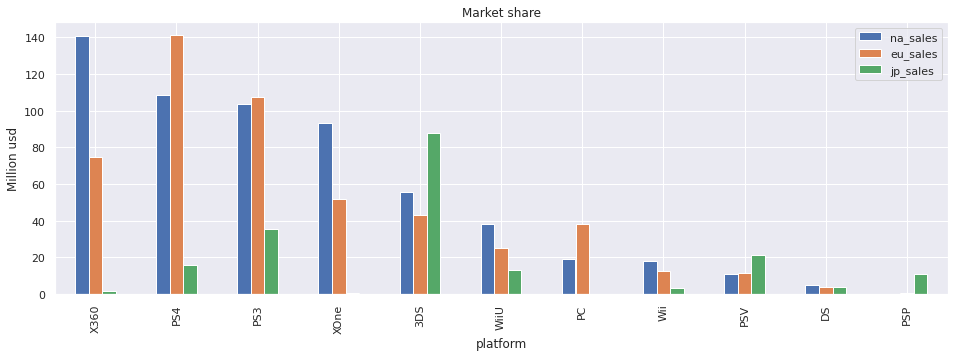

In [130]:
# Graficamos la cantidad de videojuegos en las tres regiones
games_by_region.plot(y=['na_sales', 'eu_sales', 'jp_sales'], 
                     x='platform', kind='bar', title='Market share', grid='True', figsize=(16,5))

plt.ylabel('Million usd')


- En general, Norteamérica presenta mayor venta por plataforma, salvo el caso de las plataformas de Playstation en las que triunfa Europa.


- Se produce una conducta interesante para la región de Japón, si bien normalmente presenta menor volumen de venta, es distinto el comportamiento para plataformas portátiles, donde alcanza el primer lugar para PSV, 3DS, PSP y compite de cerca a las demás en DS.
 
 
- En ventas de videojuegos PC, Europa lleva la delantera y Japón casi no presenta ventas.

**Revisemos las plataformas más populares por región:**

#### Top 5 plataformas en participación de mercado - Norteamérica

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

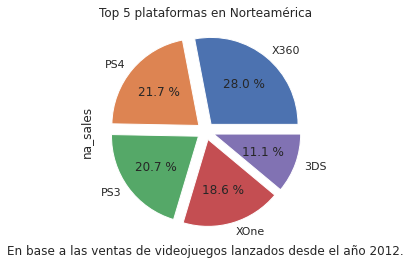

In [131]:
# Reasignamos el índice a las plataformas
na_top_platform = games_by_region[['platform', 'na_sales']]
na_top_platform = na_top_platform.set_index('platform')

# Creamos el gráfico circular
na_top_platform['na_sales'].head().plot(kind='pie', title= 'Top 5 plataformas en Norteamérica', figsize=(4,4), autopct='%0.1f %%', explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

Para Norteamérica, el ranking de ventas de videojuegos lanzados desde el año 2012, queda conformado de la siguiente manera:

    1. Xbox 360
    2. Playstation 4
    3. Playstation 3
    4. Xbox One
    5. Nintendo 3DS
    

*Nota: Debemos considerar que las ventas siguen activas pero en un fuerte descenso para PS3 y X360*


#### Top 5 plataformas en participación de mercado - Europa

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

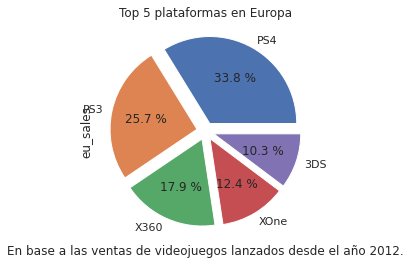

In [132]:
# Reasignamos el índice a las plataformas
eu_top_platform = games_by_region[['platform', 'eu_sales']]
eu_top_platform = eu_top_platform.set_index('platform')

# Creamos el gráfico circular
eu_top_platform['eu_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top 5 plataformas en Europa', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

Para Europa, el ranking de ventas de videojuegos lanzados desde el año 2000, queda conformado de la siguiente manera:

    1. Playstation 4
    2. Playstation 3
    3. Xbox 360
    4. Xbox One
    5. Nintendo 3DS

*Nota: Debemos considerar que las ventas siguen activas pero en un fuerte descenso para PS3 y X360*


#### Top 5 plataformas en participación de mercado - Japón

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

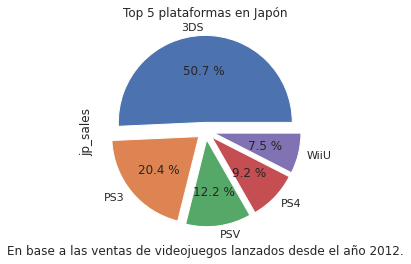

In [133]:
# Reasignamos el índice a las plataformas
jp_top_platform = games_by_region[['platform', 'jp_sales']]
jp_top_platform = jp_top_platform.set_index('platform')

# Creamos el gráfico circular
jp_top_platform['jp_sales'].sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top 5 plataformas en Japón', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

Para Japón, el ranking de ventas de videojuegos lanzados desde el año 2000, queda conformado de la siguiente manera:

    1. Nintendo 3DS
    2. Playstation 3
    3. Playstation Vita
    4. Playstation 4
    5. Nintendo WiiU

*Nota: Debemos considerar que las ventas siguen activas pero en un fuerte descenso para PS3 y PSV.


#### Conclusiones de las ventas a nivel regional

**- Norteamérica se presenta como el principal consumidor de videojuegos.**


**- La conducta del consumidor norteamericano y europeo son similares**, lo que queda reflejado en el ranking de plataformas con más ventas. La plataforma de Microsoft, Xbox 360, tiene mayor éxito en norteamérica; mientras que en Europa, los primeros lugares se los lleva Sony con Playstation 4 y Plastation 3.


**- El comportamiento de Japón es distinto, las plataformas portátiles tienen mayor éxito**, posicionando a Nintendo 3DS en primer lugar y Playstation Vita en tercero. Microsoft no aparece en el top de Japón.

#### Géneros principales para cada región

En análisis de género por región, solo observaremos los principales para cada una de las áreas. Ya tenemos una breve idea de las diferencias en las preferencias de acuerdo a plataforma, ahora profundizaremos en el estilo de videojuego.

**Top 5 géneros de videojuegos en Norteamerica:**

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

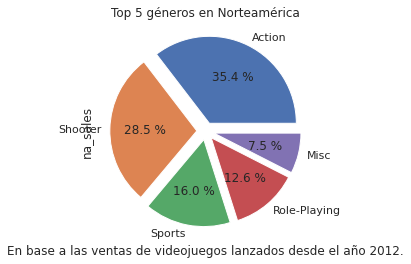

In [134]:
# Agrupamos los datos de acuerdo al género y sumamos las ventas, luego graficamos.
na_profile.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top 5 géneros en Norteamérica', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

**Para Norteamérica, el ranking queda conformado de la siguiente forma:**

    1. Acción
    2. Disparos
    3. Deportes
    4. Rol
    5. Misceláneos

- Con una tercera parte de las ventas, el género de acción se consagra como el más exitoso, le siguen los disparos y deportes. Una característica que puede agrupar estas preferencias plasmadas es los tres primeros lugares es el dinamísmo.


- Los jugadores norteamericanos prefieren los juegos dinámicos que involucren reflejos y movimiento constante.

**Top 5 géneros de videojuegos en Europa:**

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

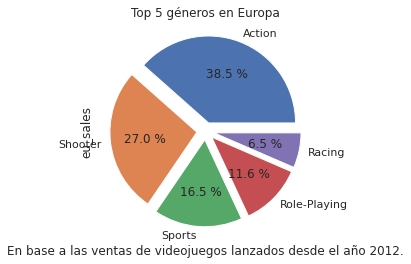

In [135]:
# Agrupamos los datos de acuerdo al género y sumamos las ventas, luego graficamos.
eu_profile.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top 5 géneros en Europa', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

**Para Europa, el ranking queda conformado de la siguiente forma:**

    1. Acción
    2. Disparos
    3. Deportes
    4. Rol
    5. Carreras

- Las preferencias de los norteamericanos con los europeos son muy similares.


- Al igual que los jugadores norteamericanos, los europeos prefieren los juegos dinámicos que involucren reflejos y movimiento constante; lo cual se confirma aún más con la aparición de los juegos de carrera en el ranking.

**Top 5 géneros de videojuegos en Japón:**

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

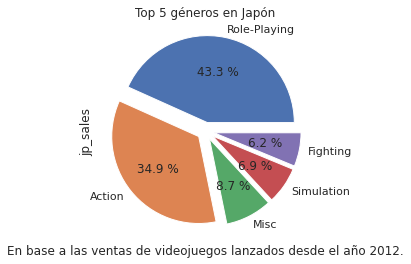

In [136]:
# Agrupamos los datos de acuerdo al género y sumamos las ventas, luego graficamos.
jp_profile.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top 5 géneros en Japón', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

**Para Japón, el ranking queda conformado de la siguiente forma:**

    1. Rol
    2. Acción
    3. Misceláneo
    4. Simulación
    5. Peleas

- Se produce una gran diferencia respecto a las anteriores regiones, los japoneses por un amplio margen prefieren los videojuegos de rol, concentrando en ellos el 43% de las ventas totales.


- A diferencia de norteamericanos y europeos, Japón no considera los juegos de disparos entre sus favoritos.


- A diferencia de las regiones occidentales, los japoneses prefieren una experiencia que los involucre para poder asumir un rol social. Generalmente en estos videojuegos, se establece la interacción de comunidades para lograr objetivos. Esto puede explicar en cierta medida la preferencia por videoconsolas portátiles, las que les permiten establecer un vinculo fuera de su hogar.

#### Conclusiones respecto a los géneros más populares a nivel regional

Pudimos confirmar que el perfil del **jugador norteamericano es similar al del europeo**: ambos prefieren los juegos dinámicos, con preferencia en los géneros de **acción, disparos y deportes.** 


Por otro lado, el perfil del **jugador japonés** es totalmente distinto, **prefiere los videojuegos pausados donde el trabajo en comunidad mediante un rol social es fundamental.** Esto es totalmente congruente con su preferencia por las plataformas portátiles.

#### Influencia de la calificación ESRB

Usaremos diagrama de cajas para observar la distribución de ventas de cada región de acuerdo al rating ESRB.


Antes, recordemos que el **ESRB** (The Entertainment Software Rating Board) es un **sistema de clasificación de contenido de videojuegos** estadounidense. Se usa con el fin de ayudar a los consumidores a elegir un contenido apropiado de acuerdo a sus preferencias.

Antes de empezar el análisis, es importante definir la sigla correspondiente a cada tipo de clasificación:


 - E: Contenido apropiado para todas las edades. (Everyone)
 - EC: Contenido apropiado desde los 3 años en adelante. (Early childhood)
 - E10+: Contenido generalmente apropiado desde 10 años en adelante. (Everyone 10+)
 - T: Contenido apropiado para 13 años en adelante. (Teen)
 - M: Contenido apropiado desde los 17 años. (Mature)
 - AO: Contenido solo para adultos. (Adults only 18+)
 

[Rating de categorías de acuerdo a la edad](https://www.esrb.org/ratings-guide/)

**1. Distribución de ventas de acuerdo al rating para Norteamérica**

Text(0.5, 0, 'ESRB - The Entertainment Software Rating Board')

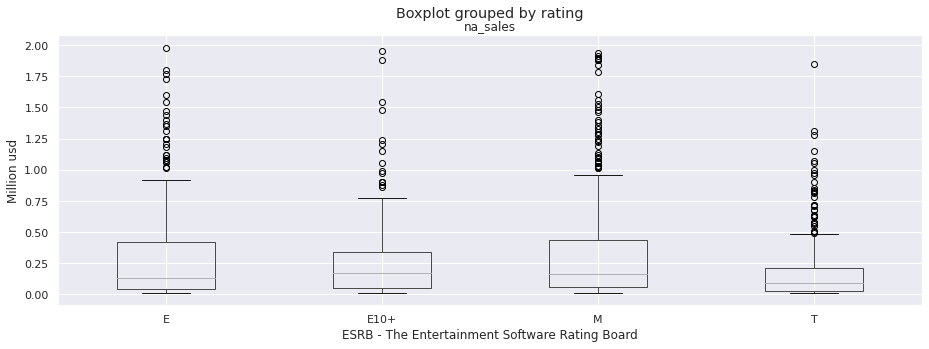

In [137]:
# Diagrama de caja para las ventas totales de acuerdo al rating
na_profile.query('na_sales < 2').boxplot(column='na_sales', by='rating', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('ESRB - The Entertainment Software Rating Board')

- Quien presenta una distribución de videojuegos con ventas más altas es el rango M, que pertenece a la calsificación de 17 años en adelante; seguido de cerca por E (todas las edades).


- La mediana en general bordea los 125 mil dólares.


- Existe una fuerte presencia de valores atípicos. 


Examinarémos las ventas totales por rating para determinar hacia dónde se inclinan las preferencias

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

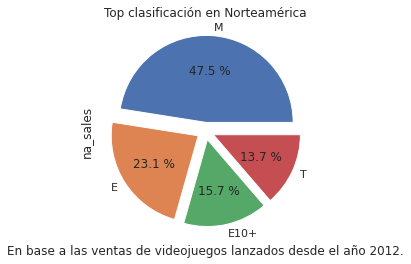

In [138]:
# Agrupamos los datos de acuerdo al rating y sumamos las ventas, luego graficamos.
na_profile.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top clasificación en Norteamérica', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

**El gráfico circular nos da a entender que a pesar de una distribución similar en las ventas de sus videojuegos, por la fuerte presencia de valores atípicos, el rating "M" (Mature) es el que representa mayor cantidad de ventas con un 47,5%.**

**2. Distribución de ventas de acuerdo al rating para Europa**

Text(0.5, 0, 'ESRB - The Entertainment Software Rating Board')

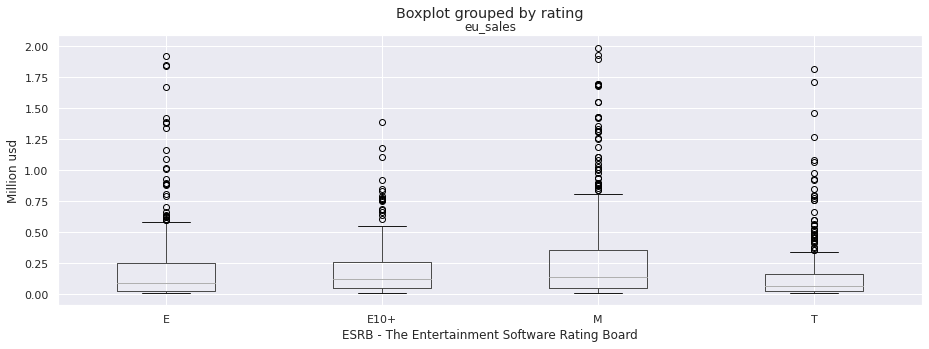

In [139]:
# Diagrama de caja para las ventas totales de acuerdo al rating
eu_profile.query('eu_sales < 2').boxplot(column='eu_sales', by='rating', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('ESRB - The Entertainment Software Rating Board')

- Todas las categorías  presentan una mediana similar. 

- Al igual que en norteamérica, la distribución favorece las ventas del rango M, seguido de E10+ y E. Veremos la diferencia que producen los valores atípicos.

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2012.')

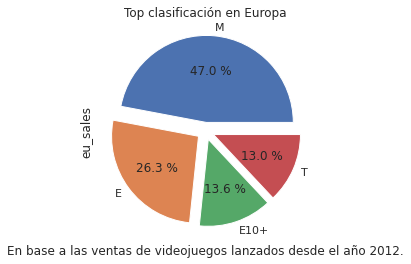

In [140]:
# Agrupamos los datos de acuerdo al rating y sumamos las ventas, luego graficamos.
eu_profile.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top clasificación en Europa', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2012.')

**Ocurre una situación similar a Norteamérica. La categoría M (Mature) se presenta como la que representa mayores ventas y la proporción de preferencias por las categorías M y E son similares.**

**3. Distribución de ventas de acuerdo al rating para Japón**

Text(0.5, 0, 'ESRB - The Entertainment Software Rating Board')

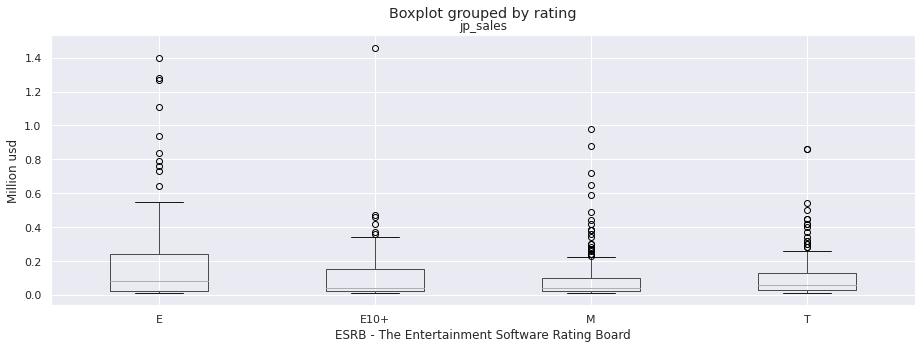

In [141]:
# Diagrama de caja para las ventas totales de acuerdo al rating
jp_profile.query('jp_sales < 2').boxplot(column='jp_sales', by='rating', grid=True, figsize=(15,5))

plt.ylabel('Million usd')
plt.xlabel('ESRB - The Entertainment Software Rating Board')

- Japón muestra un comportamiento distinto. Ahora es "E" quien presenta en general una distribución con ventas más altas. Si bien la mediana es similar para todas las categorías, se establece una diferencia más clara entre "E" y "M".

Veamos el detalle de ventas totales en un gráfico circular:

Text(0.5, 0, 'En base a las ventas de videojuegos lanzados desde el año 2000.')

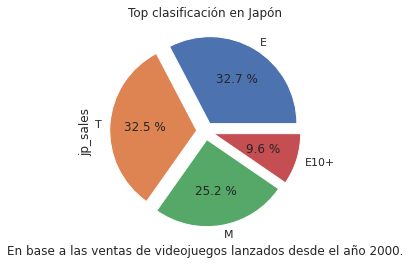

In [142]:
# Agrupamos los datos de acuerdo al rating y sumamos las ventas, luego graficamos.
jp_profile.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', 
                                                                          title= 'Top clasificación en Japón', 
                                                                          figsize=(4,4), autopct='%0.1f %%', 
                                                                          explode=(0.1,0.1,0.1,0.1))

plt.xlabel('En base a las ventas de videojuegos lanzados desde el año 2000.')

**El contenido para todo público (E) se alza levemente como el de mayor ventas, seguido de T (Teen).

**A diferencia de las otras regiones, el contenido "mature" (desde los 17 años) se desplaza al tercer lugar. Esto último puede estar relacionado a la influencia de preferencia del género; como observamos antes, los japoneses no tienen dentro de sus primeros lugares los videojuegos de disparos, que podrían estar catalogados como contenido maduro.**

#### Conclusiones de la influencia del rating ESRB para regiones

- De acuerdo a los diagramas de caja, determinamos que **el rating ESRB no es influyente** para la mayor parte de venta de videojuegos. **La distribución de sus ventas es similar.**


- Las diferencias se producen principalmente en valores atípicos; las ventas son superiores en el rating "M" (Mature), en los que supera el 40% de las ventas totales en promedio para Norteamerica y Europa.


- Por otro lado, en Japón las mayores ventas los presenta el rango E (para todo público) y T (Teen).


Es posible que de acuerdo a esto último, los japoneses prefieran un contenido más familiar, lo que se traduce en la preferencia por géneros con menor violencia (razón por la que los videojuegos de disparos no están entre las primeras preferencias).

### Conclusiones finales respecto al análisis de datos

Segmentamos los videojuegos por año de lanzamiento creando 4 grupos importantes de acuerdo a distintas décadas.

 - 1980 a 1989
 - 1990 a 1999
 - 2000 a 2009
 - 2010 a 2016

Obtuvimos que el grueso de datos se concentra entre el año 2000 y 2009, representando poco más del 60% de los registros.


**Respecto a las plataformas:**

Para las plataformas con mayores niveles de ventas, tenemos que las primeras 6 distan bastante respecto al resto de plataformas. El ranking de las plataformas más exitosas de todos los tiempos se conforma de la siguiente manera:

   1. Playstation 2
   2. Xbox 360
   3. Playstation 3
   4. Nintendo Wii
   5. Nintendo DS
   6. Playstation
   
A través de los años surgieron muchas plataformas con distintos enfoques y estilos. Hacia comienzos del 2000 la industria de los videojuegos se consolida fuertemente y algunas compañías marcan su hegemonía, como lo son Nintendo y Sony. Playstation 2 se consolidó como la plataforma más exitosa de todos los tiempos marcando fuerte presencia en las plataformas de sobremesa. Por otro lado, Nintendo marcaría algunos éxitos en algunas consolas portátiles (lo que Sony no pudo lograr con PSP o PSV) y también sembraría muy buenos resultados para Nintendo Wii, alcanzando altos peaks de venta. A la carrera de estas dos compañías se sumaría Microsoft que luego de un tibio comienzo con Xbox, se consolidaría con un rotundo éxito para Xbox 360.

Hoy en día las principales ventas se concentran en estas tres compañías, las que mantienen un ciclo de duración de sus plataformas de 10 años aproximadamente. Una vez que comienza un descenso en ventas, se espera que en el año venidero se estrene una sucesión para una de sus plataformas.


**Respecto a la crítica:**

La crítica de expertos puede ser más influyente en la decisión de compra de un videojuego que la opinión de usuarios. Si bien no existe una correlación directa, es común ver que videojuegos que presenten una crítica cercana a una valoración de 80, presenten niveles de ventas más altos. En la medida que la valoración se acerca a 90, se producen medias mucho más altas y excepciones de ventas sobresalientes y atípicas. En el caso de la valoración de usuarios la distribución es más dispersa, existen juegos con calificación baja pero altas ventas.

**Respecto al género:**

A nivel global el género de disparos presenta mayor rentabilidad, seguido de los géneros de acción y deportes que presentan muy buen rendimiento en algunos de sus títulos.

Los menos rentables son los de aventuras, puzzlez y estrategia.

**Respecto a las diferencias regionales:**

Existen diferencias claras para una de las regiones. Entre Norteamérica y Europa se presentan patrones muy similares de preferencias. Las plataformas preferidas son las mismas al igual que los géneros. Ambos prefieren plataformas de sobremesa y videojuegos dinámicos donde el constante movimiento es el lineamiento principal. Para Japón, las preferencias distan un poco; prefieren las plataformas portátiles y los videojuegos de participación en comunidad, en la que puedan desempeñar un rol específico.

Estas características también se ven reflejadas en la calificación ESRB, donde si bien, para las regiones occidentales hay una importante preferencia hacia el contenido "M" (maduro), reflejado en su preferencia por el género de disparos por ejemplo; para Japón, el contenido de preferencia es familiar.


## Prueba de hipótesis

Luego de todo el análisis previo, queremos probar algunas afirmaciones en base a los datos que hemos ordenado.

En primer lugar probarémos la siguiente hipótesis:

**1. "Las calificaciones promedio de los usuarios para las plataformas XBox One y PC son las mismas".**

    - Ambas son plataformas vigentes durante los últimos años. Xbox One pertenece a Microsoft, compañía que tiene gran 
    porción de las ventas de videojuegos para PC también. Probaremos la aceptación de los usuarios para estas plataformas.
    
    
**2. "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes".**

    - Reciéntemente analizamos los géneros y descubrimos que para Norteamérica y Europa los géneros de acción y deportes son de los que recaudan más ventas. Probaremos si poseen una valoración similar por parte de los usuarios.
    
    

### Primera hipótesis

Procedemos a hacer listas de las calificaciones de los usuarios para las plataformas de XOne y PC.

In [143]:
# Calculamos las medias para cada plataforma y asignamos a variables
xone_userscore = next_gen_games.query('platform == "XOne"')['user_score']
pc_userscore = next_gen_games.query('platform == "PC"')['user_score']

# Eliminamos las filas que puedan contener valores nulos
xone_userscore = xone_userscore.dropna()
pc_userscore = pc_userscore.dropna()

Antes de comenzar las pruebas, fijaremos nuestro **umbral para la significación estadística:**

Trabajaremos con un valor de umbral del 5%, esto quiere decir que; un 5% de probabilidad de obtener un resultado como el que consideramos, es demasiado bajo; por esto estamos dispuestos a rechazar la hipótesis nula, no porque sea incorrecto sino porque el valor real resultó estar muy lejos del propuesto.


#### Prueba de Levene

Realizaremos la prueba de Levene para determinar nuestro valor "equal_var" a ser utilizado en las pruebas t.

**Nuestra hipótesis nula será que las varianzas son iguales.**


In [144]:
# Prueba de Levene
platform_levene = st.levene(xone_userscore, pc_userscore, center='mean')
platform_levene.pvalue

0.003411084092890456

Nuestro valor pvalue = 0.0034 es mucho más bajo que nuestro nivel de significancia, por lo tanto, podemos rechazar nuestra hipótesis nula.
Las varianzas son distintas, esto quiere decir que nuestro valor de "equal_var" se asignará como False.

#### Pruebas T

**Hipótesis:**  "*Las calificaciones promedio de los usuarios para las plataformas XBox One y PC son las mismas*"

Para trabajar en esta hipótesis, usaremos las muestras estratificadas de acuerdo a plataforma y videojuegos a partir del año 2012.

**Nuestra hipótesis nula es:**

 - Las calificaciones promedio de los usuarios de Xbox One y PC son iguales.
 
**Nuestra hipótesis alternativa será:**

- Las calificaciones promedio de los usuarios de Xbox One y PC difieren.

In [145]:
# Umbral de significación
alpha = 0.05

# Probamos la hipótesis de que las calificaciones para ambas plataformas son las mismas
platform_results = st.ttest_ind(xone_userscore, pc_userscore, equal_var=False)
platform_results.pvalue

0.5982144585454865

Si alpha (0.05) es mayor a la probabilidad del resultado, se rechaza la hipótesis nula.
El resultado de la probabilidad es 0.59, por lo tanto nuestro alpha es bastante menor. Es decir, no rechazamos la hipótesis nula.

Existe un 59% de probabilidad de obtener una diferencia del tamaño de las cantidades promedio o mayor. Es una probabilidad alta para concluir que existe igualdad entre las calificaciones de los usuarios.

#### Resultado primera hipótesis

**Nuestra primera hipótesis:** 
"*Las calificaciones promedio de los usuarios para las plataformas XBox One y PC son las mismas*"

**Es aceptada.**

La valoración de usuarios para ambas plataformas no difiere significativamente.

### Segunda hipótesis

Procedemos a hacer listas de las calificaciones de los usuarios para los géneros de acción y deportes.

In [146]:
# Calculamos las medias para cada plataforma y asignamos a variables
action_userscore = next_gen_games.query('genre == "Action"')['user_score']
sports_userscore = next_gen_games.query('genre == "Sports"')['user_score']

# Eliminamos las filas que puedan contener valores nulos
action_userscore = action_userscore.dropna()
sports_userscore = sports_userscore.dropna()


Antes de comenzar las pruebas, fijaremos nuestro **umbral para la significación estadística:**

Trabajaremos con un valor de umbral del 5%, esto quiere decir que; un 5% de probabilidad de obtener un resultado como el que consideramos, es demasiado bajo; por esto estamos dispuestos a rechazar la hipótesis nula, no porque sea incorrecto sino porque el valor real resultó estar muy lejos del propuesto.


#### Prueba de Levene

Realizaremos la prueba de Levene para determinar nuestro valor "equal_var" a ser utilizado en las pruebas t.

**Nuestra hipótesis nula será que las varianzas son iguales.**


In [147]:
# Prueba de Levene
genre_levene = st.levene(action_userscore, sports_userscore, center='mean')
genre_levene.pvalue

7.047378520301409e-06

Nuestro valor pvalue es bastante más bajo a alpha, por lo tanto, podemos rechazar nuestra hipótesis nula.
Las varianzas son distintas, esto quiere decir que nuestro valor de "equal_var" se asignará como False.

#### Pruebas T

**Hipótesis:**  "*Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes*"

Para trabajar en esta hipótesis, usaremos las muestras estratificadas de acuerdo a los géneros y videojuegos a partir del año 2012.

**Nuestra hipótesis nula es:**

 - Las calificaciones promedio de los usuarios de Xbox One y PC son las mismas.
 
**Nuestra hipótesis alternativa será:**

- Las calificaciones promedio de los usuarios de Xbox One y PC difieren.

In [148]:
# Umbral de significación
alpha = 0.05

# Probamos la hipótesis de que las calificaciones para ambas plataformas son las mismas
genre_results = st.ttest_ind(action_userscore, sports_userscore, equal_var=False)
genre_results.pvalue

1.1387075616788642e-18

Si alpha (0.05) es mayor a la probabilidad del resultado, se rechaza la hipótesis nula.
El resultado de la probabilidad es bastante bajo, por lo tanto nuestro alpha es mayor. Es decir, rechazamos la hipótesis nula.

Existe una probabilidad muy baja de obtener una diferencia del tamaño de las cantidades promedio o mayor. Podemos concluir que no existe igualdad entre las calificaciones de los usuarios.

#### Resultado segunda hipótesis

**Nuestra primera hipótesis:** 
"*Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes*"

**Es aceptada.**

La valoración de usuarios para ambas géneros es distinta.

## Conclusiones

Trabajamos un amplio conjunto de datos con registros del detalle de videojuegos desde el año 1980 al 2016.

Se trataron los datos completando algunos valores ausentes en la medida de no transformar de manera drástica los resultados que se podrían esperar. Hubo ajustes en el tipo de datos y algunas correcciones menores como verificación de valores numéricos, duplicados y nombre escritos correctamente.

Los reemplazos de valores ausentes en algunas columnas solo afectaron a una pequeña porción de los datos, siempre menor al 6% del total de los registros.


El análisis de datos tuvo dos componentes principales: el entendimiento de las ventas dado los patrones que presentaban las plataformas a través del tiempo y las características que presentaban los usuarios a nivel regional.
    
    
 - Descubrimos que a partir de la década del 2000, la industria se fortaleció en base a la experiencia de muchas videoconsolas que pasaron sin mayor éxito con anterioridad.
 
 
 - Tres compañías se hicieron fuertes desde ese entonces: Nintendo, Sony y Microsoft; las que presentan tres de las plataformas más populares de todos los tiempos: Nintendo Wii, Playstation 2 y Xbox 360 respectivamente.


- El ciclo de vida de estas plataformas es similar; con una duración de 10 años en promedio, luego de alcanzar su peak de ventas y comenzar su deceso, ya se alista el lanzamiento de una nueva plataforma para el año venidero.


- Los usuarios occidentales presentan comportamientos muy similares (Norteamérica y Europa); no así Japón, que presenta preferencia por las plataformas portátiles y videojuegos de rol.
 
 
- El mayor consumidor de videojuegos en el mundo es Norteamérica, quien tiene preferencia por las plataformas de sobremesa; no importando la compañía ya que presenta buenas ventas tanto para las sagas de Playstation, Xbox y Wii.


**Para preparar nuestros proyectos de 2017 hay que poner especial atención en las diferencias regionales:**

 - Los jugadores Norteamericanos y Europeos prefieren los juegos dinámicos: Shooter, acción y deportes son sus géneros favoritos.
 
 
 - Para Japón el roleplay en consolas portátiles puede generar muy buenas ventas.
 
 
 - El énfasis debe estar puesto en Playstation 4 que muestra una mejor curva de crecimiento y se encuentra en una fase temprana antes de alcanzar su peak de ventas. Xbox One le sigue en segundo lugar; si bien no experimenta un crecimiento tan grande como Playstation, es una compañía que ha presentado cierta estabilidad los últimos años.
 
 
- En cuanto a Nintendo, hay que estar atento a los próximos anuncios de nuevas plataformas. Nintendo 3DS y Nintendo WiiU no han presentado el éxito esperado y vienen con un decayendo en ventas. Es de esperar el lanzamiento de una nueva plataforma ante los últimos resultados que ha tenido la compañía.


**Respecto a las pruebas de hipótesis:**

**Aceptamos ambas hipótesis:**

1. *Las calificaciones promedio de los usuarios para las plataformas XBox One y PC son las mismas*.
2. *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes*.

La primera hipótesis contempla dos plataformas en las que una misma compañía tiene fuerte presencia, Microsoft. Es de esperar que los títulos sean prácticamente los mismos para ambas, por lo tanto, la calificación de los usuarios difícilmente tendría que variar.

Respecto de la segunda hipótesis, hay leves factores que determinan una relativa igualdad entre ambos géneros, pero no podemos asegurar del todo que la calificación sea la misma. Existen otras características que involucran la evaluación de un videojuego y no disponemos de información tan detallada como para determinar si realmente son iguales.